# Movie Price Data from King County
* John Paul Hernandez Alcala 
* Part Time
* 6/25/2020 
* Eli
* Blog post URL:


## Libraries Used

In [174]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
from scipy.stats import pointbiserialr
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline


## Data Science Lifecycle
Like with every project, we must first look to map for our data filled journey:
[![DataScienceLifecycle](http://sudeep.co/images/post_images/2018-02-09-Understanding-the-Data-Science-Lifecycle/chart.png)](http://sudeep.co/images/post_images/2018-02-09-Understanding-the-Data-Science-Lifecycle/chart.png)

We us the above Data Science Lifecyle to structure and organize this project. In this project we will follow this structure. We will see, at times, these steps will be revisited.
## Business Understanding
From above, we see at "01" that we must obtain ask ourselves relevant questions and define objectives:
### Questions:
* "Why did you pick those features as predictors?"
    * **These predictors will have p-values less than 0.05 and highly influence house price**
* "How confident are you in the predictive quality of the results?"
    * **Because we are only going to us predictors that have p-values less than 0.05, there is a 5% risk of concluding that these predictors influence housing prices when there is no actual influence.**
* "What are some of the things that could cause the results to be wrong?"
    * **Undetected collinearity, bias variance or inappropriate data exclusion.**

### Objectives:
* Clean, explore, and model this dataset with a multivariate linear regression to predict the sale price of houses as accurately as possible
* Render at least 4 meaningful data visualizations, with corresponding interpretations
* Pose at least 3 meaningful questions and answer them through EDA
* 1 - 2 paragraphs briefly explaining your approach to this project
* Model should not include any predictors with p-values greater than .05.
* Present an iterative approach to modeling, and details the parameters and results of the model at each iteration
* Provide at least 1 paragraph explaining your final model.
* Pick at least 3 coefficients from your final model and explain their impact on the price of a house in this dataset.
* Identify at least two concrete features that highly influence housing prices.

## Data Mining
Moving on to "02", we must gather and scrape the data necessary for this project. We will only be using data from King County dataset provided by Flatiron School. We import this data into a pandas DataFrame and display the first five entries to ensure correct importation:

### Importing Data

In [1]:
import pandas as pd

df = pd.read_csv('./kc_house_data.csv') # './' means find in home directory or where you saved all your project stuff
df.head() #dispays the first 5 entries

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

## Data Cleaning
Next, "03" says we fix inconsistencies within our data and handle missing values. Inconsistencies mean for example the presence of duplicate values or extremely high/low numbers which are indications for absent data, unevenly distributed data, or just plain NaN values (i.e. also means absent data). Here is a quick look at the data:

In [2]:
df.info() # tells the number of columns and entries for each column with data type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

### Duplicated Entries

In [3]:
df[df.duplicated(subset='id')] #check if there are duplicated id's
#below are all the duplicated entries

id        date      price  bedrooms  bathrooms  sqft_living  \
94     6021501535  12/23/2014   700000.0         3       1.50         1580   
314    4139480200   12/9/2014  1400000.0         4       3.25         4290   
325    7520000520   3/11/2015   240500.0         2       1.00         1240   
346    3969300030  12/29/2014   239900.0         4       1.00         1000   
372    2231500030   3/24/2015   530000.0         4       2.25         2180   
...           ...         ...        ...       ...        ...          ...   
20165  7853400250   2/19/2015   645000.0         4       3.50         2910   
20597  2724049222   12/1/2014   220000.0         2       2.50         1000   
20654  8564860270   3/30/2015   502000.0         4       2.50         2680   
20764  6300000226    5/4/2015   380000.0         4       1.00         1200   
21565  7853420110    5/4/2015   625000.0         3       3.00         2780   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
94         5000     1.0         0.0   0.0  ...      8        1290   
314       12103     1.0         0.0   3.0  ...     11        2690   
325       12092     1.0         0.0   0.0  ...      6         960   
346        7134     1.0         0.0   0.0  ...      6        1000   
372       10754     1.0         0.0   0.0  ...      7        1100   
...         ...     ...         ...   ...  ...    ...         ...   
20165      5260     2.0         0.0   0.0  ...      9        2910   
20597      1092     2.0         0.0   0.0  ...      7         990   
20654      5539     2.0         NaN   0.0  ...      8        2680   
20764      2171     1.5         0.0   0.0  ...      7        1200   
21565      6000     2.0         0.0   0.0  ...      9        2780   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
94             290.0     1939           0.0    98117  47.6870 -122.386   
314           1600.0     1997           0.0    98006  47.5503 -122.102   
325            280.0     1922        1984.0    98146  47.4957 -122.352   
346              0.0     1943           NaN    98178  47.4897 -122.240   
372           1080.0     1954           0.0    98133  47.7711 -122.341   
...              ...      ...           ...      ...      ...      ...   
20165            0.0     2012           0.0    98065  47.5168 -121.883   
20597           10.0     2004           0.0    98118  47.5419 -122.271   
20654            0.0     2013           0.0    98045  47.4759 -121.734   
20764            0.0     1933           0.0    98133  47.7076 -122.342   
21565            0.0     2013           NaN    98065  47.5184 -121.886   

       sqft_living15  sqft_lot15  
94              1570        4500  
314             3860       11244  
325             1820        7460  
346             1020        7138  
372             1810        6929  
...              ...         ...  
20165           2910        5260  
20597           1330        1466  
20654           2680        5992  
20764           1130        1598  
21565           2850        6000  

[177 rows x 21 columns]

In [4]:
df[df.id == 6021501535] #this is one of the duplicated id's

id        date     price  bedrooms  bathrooms  sqft_living  \
93  6021501535   7/25/2014  430000.0         3        1.5         1580   
94  6021501535  12/23/2014  700000.0         3        1.5         1580   

    sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
93      5000     1.0         0.0   0.0  ...      8        1290          290.0   
94      5000     1.0         0.0   0.0  ...      8        1290          290.0   

   yr_built  yr_renovated  zipcode     lat     long  sqft_living15  sqft_lot15  
93     1939           0.0    98117  47.687 -122.386           1570        4500  
94     1939           0.0    98117  47.687 -122.386           1570        4500  

[2 rows x 21 columns]

Note: the below code was adapted from [Resource 1](#Resources:)

In [5]:
# from df.info() we see that date is an object type. 
df['date'] = pd.to_datetime(df['date']) #let's covert it to a datetime type for sorting.(1)

In [6]:
df.sort_values(by='date', ascending=False, inplace=True) #sort from most recent date first to least recent date last.
df

id       date      price  bedrooms  bathrooms  sqft_living  \
16580  9106000005 2015-05-27  1310000.0         4       2.25         3750   
13040  5101400871 2015-05-24   445500.0         2       1.75         1390   
5632   7923600250 2015-05-15   450000.0         5       2.00         1870   
15797  7129304540 2015-05-14   440000.0         5       2.00         1430   
927    8730000270 2015-05-14   359000.0         2       2.75         1370   
...           ...        ...        ...       ...        ...          ...   
7316   2202500290 2014-05-02   435000.0         4       1.00         1450   
19661  7853220390 2014-05-02   785000.0         5       3.25         3660   
6418   2011000010 2014-05-02   257950.0         3       1.75         1370   
10689  2738600140 2014-05-02   499950.0         4       2.50         2860   
4959   7525000080 2014-05-02   588500.0         3       1.75         2330   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
16580      5000     2.0         0.0   0.0  ...      8        2440   
13040      6670     1.0         0.0   0.0  ...      6         720   
5632       7344     1.5         0.0   0.0  ...      7        1870   
15797      5600     1.5         0.0   0.0  ...      6        1430   
927        1140     2.0         0.0   0.0  ...      8        1080   
...         ...     ...         ...   ...  ...    ...         ...   
7316       8800     1.0         0.0   0.0  ...      7        1450   
19661     11995     2.0         0.0   2.0  ...     10        3660   
6418       5858     1.0         NaN   0.0  ...      7        1370   
10689      3345     2.0         0.0   0.0  ...      8        2190   
4959      14892     1.0         0.0   0.0  ...      8        1970   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
16580         1310.0     1924           0.0    98115  47.6747 -122.303   
13040          670.0     1941           0.0    98115  47.6914 -122.308   
5632             0.0     1960           0.0    98007  47.5951 -122.144   
15797            0.0     1947           0.0    98118  47.5192 -122.266   
927            290.0     2009           0.0    98133  47.7052 -122.343   
...              ...      ...           ...      ...      ...      ...   
7316             0.0     1954           0.0    98006  47.5746 -122.135   
19661            0.0     2006           0.0    98065  47.5337 -121.860   
6418             0.0     1987           0.0    98198  47.3815 -122.313   
10689          670.0     2004           0.0    98072  47.7735 -122.158   
4959           360.0     1980           0.0    98074  47.6267 -122.046   

       sqft_living15  sqft_lot15  
16580           2170        4590  
13040            920        6380  
5632            1870        7650  
15797           1860        5980  
927             1370        1090  
...              ...         ...  
7316            1260        8942  
19661           3320       11241  
6418            1400        7500  
10689           2860        3596  
4959            2570       14217  

[21597 rows x 21 columns]

In [7]:
df.drop_duplicates(subset='id', keep='first', inplace=True) #keep the entry id with the most recent date
df

id       date      price  bedrooms  bathrooms  sqft_living  \
16580  9106000005 2015-05-27  1310000.0         4       2.25         3750   
13040  5101400871 2015-05-24   445500.0         2       1.75         1390   
5632   7923600250 2015-05-15   450000.0         5       2.00         1870   
15797  7129304540 2015-05-14   440000.0         5       2.00         1430   
927    8730000270 2015-05-14   359000.0         2       2.75         1370   
...           ...        ...        ...       ...        ...          ...   
7316   2202500290 2014-05-02   435000.0         4       1.00         1450   
19661  7853220390 2014-05-02   785000.0         5       3.25         3660   
6418   2011000010 2014-05-02   257950.0         3       1.75         1370   
10689  2738600140 2014-05-02   499950.0         4       2.50         2860   
4959   7525000080 2014-05-02   588500.0         3       1.75         2330   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
16580      5000     2.0         0.0   0.0  ...      8        2440   
13040      6670     1.0         0.0   0.0  ...      6         720   
5632       7344     1.5         0.0   0.0  ...      7        1870   
15797      5600     1.5         0.0   0.0  ...      6        1430   
927        1140     2.0         0.0   0.0  ...      8        1080   
...         ...     ...         ...   ...  ...    ...         ...   
7316       8800     1.0         0.0   0.0  ...      7        1450   
19661     11995     2.0         0.0   2.0  ...     10        3660   
6418       5858     1.0         NaN   0.0  ...      7        1370   
10689      3345     2.0         0.0   0.0  ...      8        2190   
4959      14892     1.0         0.0   0.0  ...      8        1970   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
16580         1310.0     1924           0.0    98115  47.6747 -122.303   
13040          670.0     1941           0.0    98115  47.6914 -122.308   
5632             0.0     1960           0.0    98007  47.5951 -122.144   
15797            0.0     1947           0.0    98118  47.5192 -122.266   
927            290.0     2009           0.0    98133  47.7052 -122.343   
...              ...      ...           ...      ...      ...      ...   
7316             0.0     1954           0.0    98006  47.5746 -122.135   
19661            0.0     2006           0.0    98065  47.5337 -121.860   
6418             0.0     1987           0.0    98198  47.3815 -122.313   
10689          670.0     2004           0.0    98072  47.7735 -122.158   
4959           360.0     1980           0.0    98074  47.6267 -122.046   

       sqft_living15  sqft_lot15  
16580           2170        4590  
13040            920        6380  
5632            1870        7650  
15797           1860        5980  
927             1370        1090  
...              ...         ...  
7316            1260        8942  
19661           3320       11241  
6418            1400        7500  
10689           2860        3596  
4959            2570       14217  

[21420 rows x 21 columns]

### Missing Values
Now that we have taken care of duplicate values, we can look at missing data.

In [8]:
df.info() # helps us see in which columns the NaN's reside

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 16580 to 4959
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21420 non-null  int64         
 1   date           21420 non-null  datetime64[ns]
 2   price          21420 non-null  float64       
 3   bedrooms       21420 non-null  int64         
 4   bathrooms      21420 non-null  float64       
 5   sqft_living    21420 non-null  int64         
 6   sqft_lot       21420 non-null  int64         
 7   floors         21420 non-null  float64       
 8   waterfront     19067 non-null  float64       
 9   view           21357 non-null  float64       
 10  condition      21420 non-null  int64         
 11  grade          21420 non-null  int64         
 12  sqft_above     21420 non-null  int64         
 13  sqft_basement  21420 non-null  object        
 14  yr_built       21420 non-null  int64         
 15  yr_renovated   1

From above, we see that most columns have 21420 non-null entires. Let's look at the stats for each column as well:

In [9]:
df.describe() #helps us see how skewed the data is by comparing the column's mean to the column's 50% quartile.

id         price      bedrooms     bathrooms   sqft_living  \
count  2.142000e+04  2.142000e+04  21420.000000  21420.000000  21420.000000   
mean   4.580940e+09  5.418614e+05      3.373950      2.118429   2083.132633   
std    2.876761e+09  3.675569e+05      0.925405      0.768720    918.808412   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123537e+09  3.249500e+05      3.000000      1.750000   1430.000000   
50%    3.904921e+09  4.505500e+05      3.000000      2.250000   1920.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.142000e+04  21420.000000  19067.000000  21357.000000  21420.000000   
mean   1.512804e+04      1.495985      0.007657      0.234677      3.410784   
std    4.153080e+04      0.540081      0.087172      0.766459      0.650035   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.614000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.069050e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above      yr_built  yr_renovated      zipcode  \
count  21420.000000  21420.000000  21420.000000  17607.000000  21420.00000   
mean       7.662792   1791.170215   1971.092997     83.890101  98077.87437   
std        1.171971    828.692965     29.387141    400.534473     53.47748   
min        3.000000    370.000000   1900.000000      0.000000  98001.00000   
25%        7.000000   1200.000000   1952.000000      0.000000  98033.00000   
50%        7.000000   1560.000000   1975.000000      0.000000  98065.00000   
75%        8.000000   2220.000000   1997.000000      0.000000  98117.00000   
max       13.000000   9410.000000   2015.000000   2015.000000  98199.00000   

                lat          long  sqft_living15     sqft_lot15  
count  21420.000000  21420.000000   21420.000000   21420.000000  
mean      47.560197   -122.213784    1988.384080   12775.718161  
std        0.138589      0.140791     685.537057   27345.621867  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471200   -122.328000    1490.000000    5100.000000  
50%       47.572100   -122.230000    1840.000000    7620.000000  
75%       47.678100   -122.125000    2370.000000   10086.250000  
max       47.777600   -121.315000    6210.000000  871200.000000

From the above, we see that 'waterfront', 'view', and 'yr_renovated' have NaN values and at least 75% of the data is made up of zeros. Let us look at 'waterfront' first, then we will look at the others. 'waterfront' has a very low mean of 0.007657. Let's take a closer look at it.

In [10]:
df.waterfront.value_counts() #this gives what values are in the column

0.0    18921
1.0      146
Name: waterfront, dtype: int64

In [11]:
len(df[df.waterfront.isna()]) #this tells us how many values are NaN out of 21420

2353

In [12]:
len(df.waterfront.values) #makes sure there are 21420 entries

21420

In [13]:
#Percent that is a 0 or 'No' from waterfront excluding NaN values
print(f'Percent of data that is 0 (i.e.\'No\') excluding NaN\'s: {round(((df.waterfront.value_counts()[0]))/(len(df)-len(df[df.waterfront.isna()])) * 100, 2)}%')
#Percent that is a NaN from waterfront with overall data
print(f'Percent of data that is NaN: {round((len(df[df.waterfront.isna()]))/len(df) * 100, 2)}%')
#Percent that is a 0 or NaN with overall data
print(f'Percent of data that is either 0 (i.e.\'No\') or NaN: {round((df.waterfront.value_counts()[0]+len(df[df.waterfront.isna()]))/len(df) * 100, 2)}%')

Percent of data that is 0 (i.e.'No') excluding NaN's: 99.23%
Percent of data that is NaN: 10.99%
Percent of data that is either 0 (i.e.'No') or NaN: 99.32%


From the above, we determine that we can drop 'waterfront' column, but not the complete house entry (row) because: 
1. Virtually all the houses do not have a 'waterfront'.
2. NaN's make up 10.99% of our data.


In [14]:
df.drop(labels='waterfront', axis=1, inplace=True) #drops 'waterfront' column
df

id       date      price  bedrooms  bathrooms  sqft_living  \
16580  9106000005 2015-05-27  1310000.0         4       2.25         3750   
13040  5101400871 2015-05-24   445500.0         2       1.75         1390   
5632   7923600250 2015-05-15   450000.0         5       2.00         1870   
15797  7129304540 2015-05-14   440000.0         5       2.00         1430   
927    8730000270 2015-05-14   359000.0         2       2.75         1370   
...           ...        ...        ...       ...        ...          ...   
7316   2202500290 2014-05-02   435000.0         4       1.00         1450   
19661  7853220390 2014-05-02   785000.0         5       3.25         3660   
6418   2011000010 2014-05-02   257950.0         3       1.75         1370   
10689  2738600140 2014-05-02   499950.0         4       2.50         2860   
4959   7525000080 2014-05-02   588500.0         3       1.75         2330   

       sqft_lot  floors  view  condition  grade  sqft_above sqft_basement  \
16580      5000     2.0   0.0          5      8        2440        1310.0   
13040      6670     1.0   0.0          3      6         720         670.0   
5632       7344     1.5   0.0          3      7        1870           0.0   
15797      5600     1.5   0.0          3      6        1430           0.0   
927        1140     2.0   0.0          3      8        1080         290.0   
...         ...     ...   ...        ...    ...         ...           ...   
7316       8800     1.0   0.0          4      7        1450           0.0   
19661     11995     2.0   2.0          3     10        3660           0.0   
6418       5858     1.0   0.0          3      7        1370           0.0   
10689      3345     2.0   0.0          3      8        2190         670.0   
4959      14892     1.0   0.0          3      8        1970         360.0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
16580      1924           0.0    98115  47.6747 -122.303           2170   
13040      1941           0.0    98115  47.6914 -122.308            920   
5632       1960           0.0    98007  47.5951 -122.144           1870   
15797      1947           0.0    98118  47.5192 -122.266           1860   
927        2009           0.0    98133  47.7052 -122.343           1370   
...         ...           ...      ...      ...      ...            ...   
7316       1954           0.0    98006  47.5746 -122.135           1260   
19661      2006           0.0    98065  47.5337 -121.860           3320   
6418       1987           0.0    98198  47.3815 -122.313           1400   
10689      2004           0.0    98072  47.7735 -122.158           2860   
4959       1980           0.0    98074  47.6267 -122.046           2570   

       sqft_lot15  
16580        4590  
13040        6380  
5632         7650  
15797        5980  
927          1090  
...           ...  
7316         8942  
19661       11241  
6418         7500  
10689        3596  
4959        14217  

[21420 rows x 20 columns]

In [15]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.142000e+04  2.142000e+04  21420.000000  21420.000000  21420.000000   
mean   4.580940e+09  5.418614e+05      3.373950      2.118429   2083.132633   
std    2.876761e+09  3.675569e+05      0.925405      0.768720    918.808412   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123537e+09  3.249500e+05      3.000000      1.750000   1430.000000   
50%    3.904921e+09  4.505500e+05      3.000000      2.250000   1920.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors          view     condition         grade  \
count  2.142000e+04  21420.000000  21357.000000  21420.000000  21420.000000   
mean   1.512804e+04      1.495985      0.234677      3.410784      7.662792   
std    4.153080e+04      0.540081      0.766459      0.650035      1.171971   
min    5.200000e+02      1.000000      0.000000      1.000000      3.000000   
25%    5.040000e+03      1.000000      0.000000      3.000000      7.000000   
50%    7.614000e+03      1.500000      0.000000      3.000000      7.000000   
75%    1.069050e+04      2.000000      0.000000      4.000000      8.000000   
max    1.651359e+06      3.500000      4.000000      5.000000     13.000000   

         sqft_above      yr_built  yr_renovated      zipcode           lat  \
count  21420.000000  21420.000000  17607.000000  21420.00000  21420.000000   
mean    1791.170215   1971.092997     83.890101  98077.87437     47.560197   
std      828.692965     29.387141    400.534473     53.47748      0.138589   
min      370.000000   1900.000000      0.000000  98001.00000     47.155900   
25%     1200.000000   1952.000000      0.000000  98033.00000     47.471200   
50%     1560.000000   1975.000000      0.000000  98065.00000     47.572100   
75%     2220.000000   1997.000000      0.000000  98117.00000     47.678100   
max     9410.000000   2015.000000   2015.000000  98199.00000     47.777600   

               long  sqft_living15     sqft_lot15  
count  21420.000000   21420.000000   21420.000000  
mean    -122.213784    1988.384080   12775.718161  
std        0.140791     685.537057   27345.621867  
min     -122.519000     399.000000     651.000000  
25%     -122.328000    1490.000000    5100.000000  
50%     -122.230000    1840.000000    7620.000000  
75%     -122.125000    2370.000000   10086.250000  
max     -121.315000    6210.000000  871200.000000

After we do this, let us check out if we can drop 'view' and 'yr_renovated' as well.

In [16]:
df.view.value_counts() #tells us which values are in 'view' column

0.0    19253
2.0      956
3.0      505
1.0      329
4.0      314
Name: view, dtype: int64

In [17]:
[num for num in df.view.value_counts() if num < 1000] #this shows how to isolate the number of values other than zero.

[956, 505, 329, 314]

In [18]:
other_values = sum([num for num in df.view.value_counts() if num < 1000]) #calculates total number of values other than zero

In [19]:
len(df[df.view.isna()]) #tells us number of NaN's in 'view' column

63

In [20]:
len(df.view.values) #tells us the number of data entries for 'view' column

21420

In [21]:
[num for num in df.view.value_counts() if num < 1000] #this calculates the number of values other than zero.

[956, 505, 329, 314]

In [22]:
other_values = sum([num for num in df.view.value_counts() if num < 1000])

In [23]:
#Percent that is a 0 or 'No' from waterfront excluding NaN values
print(f'Percent of data that is 0 (i.e.\'No\') excluding NaN\'s: {round(((df.view.value_counts()[0]))/(len(df)-len(df[df.view.isna()])) * 100, 2)}%')
#Percent that is a NaN from waterfront with overall data
print(f'Percent of data that is NaN: {round((len(df[df.view.isna()]))/len(df) * 100, 2)}%')
#Percent that is a 0 or NaN with overall data
print(f'Percent of data that is either 0 (i.e.\'No\') or NaN: {round((df.view.value_counts()[0]+len(df[df.view.isna()]))/len(df) * 100, 2)}%')
#Percent that is value other than 0
print(f'Percent of data that is a value other than 0 excluding NaN\'s: {round((other_values)/(len(df)-len(df[df.view.isna()])) * 100, 2)}%')

Percent of data that is 0 (i.e.'No') excluding NaN's: 90.15%
Percent of data that is NaN: 0.29%
Percent of data that is either 0 (i.e.'No') or NaN: 90.18%
Percent of data that is a value other than 0 excluding NaN's: 9.85%


From the above, we determine that we can drop house entries (rows) that have NaN for the 'view' column, but not the complete column because: 

1. Only 0.29% of houses have NaN for 'view'
2. Other values besides 0 make up almost 10% of data with NaN entries taken out.

In [24]:
df.dropna(subset=['view'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21357 entries, 16580 to 4959
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21357 non-null  int64         
 1   date           21357 non-null  datetime64[ns]
 2   price          21357 non-null  float64       
 3   bedrooms       21357 non-null  int64         
 4   bathrooms      21357 non-null  float64       
 5   sqft_living    21357 non-null  int64         
 6   sqft_lot       21357 non-null  int64         
 7   floors         21357 non-null  float64       
 8   view           21357 non-null  float64       
 9   condition      21357 non-null  int64         
 10  grade          21357 non-null  int64         
 11  sqft_above     21357 non-null  int64         
 12  sqft_basement  21357 non-null  object        
 13  yr_built       21357 non-null  int64         
 14  yr_renovated   17556 non-null  float64       
 15  zipcode        2

Finally, let's look at what values are in 'yr_renovated' and the stats:

In [25]:
df.yr_renovated.value_counts()

0.0       16817
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1948.0        1
1971.0        1
1954.0        1
1950.0        1
1944.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [26]:
df.yr_renovated.min(), df.yr_renovated.max(), df.yr_renovated.mean(), df.yr_renovated.std() #we use this to look at the value spread

(0.0, 2015.0, 84.02016404647983, 400.83140986202795)

In [27]:
len(df[df.yr_renovated.isna()])

3801

In [28]:
len(df.yr_renovated)

21357

In [29]:
#Percent that is a 0 or 'No' from 'yr_renovated' excluding NaN values
print(f'Percent of data that is 0 (i.e.\'No\') excluding NaN\'s: {round(((df.yr_renovated.value_counts()[0]))/(len(df)-len(df[df.yr_renovated.isna()])) * 100, 2)}%')
#Percent that is a NaN from 'yr_renovated' with overall data
print(f'Percent of data that is NaN: {round((len(df[df.yr_renovated.isna()]))/len(df) * 100, 2)}%')
#Percent that is a 0 or NaN with overall data
print(f'Percent of data that is either 0 (i.e.\'No\') or NaN: {round((df.yr_renovated.value_counts()[0]+len(df[df.yr_renovated.isna()]))/len(df) * 100, 2)}%')
#Percent that is value other than 0
other_values = sum([num for num in df.yr_renovated.value_counts() if num < 10000])
print(f'Percent of data that is a value other than 0 excluding NaN\'s: {round((other_values)/(len(df)-len(df[df.yr_renovated.isna()])) * 100, 2)}%')

Percent of data that is 0 (i.e.'No') excluding NaN's: 95.79%
Percent of data that is NaN: 17.8%
Percent of data that is either 0 (i.e.'No') or NaN: 96.54%
Percent of data that is a value other than 0 excluding NaN's: 4.21%


From the above, we determine that we can drop 'yr_renovated' column, but not the complete house entry (row) because: 
1. More than 95% of all the houses have no renovation date.
2. NaN's make up 17.8% of our data for this column.

In [30]:
df.drop(labels='yr_renovated', axis=1, inplace=True) #drops 'yr_renovated' column
df

id       date      price  bedrooms  bathrooms  sqft_living  \
16580  9106000005 2015-05-27  1310000.0         4       2.25         3750   
13040  5101400871 2015-05-24   445500.0         2       1.75         1390   
5632   7923600250 2015-05-15   450000.0         5       2.00         1870   
15797  7129304540 2015-05-14   440000.0         5       2.00         1430   
927    8730000270 2015-05-14   359000.0         2       2.75         1370   
...           ...        ...        ...       ...        ...          ...   
7316   2202500290 2014-05-02   435000.0         4       1.00         1450   
19661  7853220390 2014-05-02   785000.0         5       3.25         3660   
6418   2011000010 2014-05-02   257950.0         3       1.75         1370   
10689  2738600140 2014-05-02   499950.0         4       2.50         2860   
4959   7525000080 2014-05-02   588500.0         3       1.75         2330   

       sqft_lot  floors  view  condition  grade  sqft_above sqft_basement  \
16580      5000     2.0   0.0          5      8        2440        1310.0   
13040      6670     1.0   0.0          3      6         720         670.0   
5632       7344     1.5   0.0          3      7        1870           0.0   
15797      5600     1.5   0.0          3      6        1430           0.0   
927        1140     2.0   0.0          3      8        1080         290.0   
...         ...     ...   ...        ...    ...         ...           ...   
7316       8800     1.0   0.0          4      7        1450           0.0   
19661     11995     2.0   2.0          3     10        3660           0.0   
6418       5858     1.0   0.0          3      7        1370           0.0   
10689      3345     2.0   0.0          3      8        2190         670.0   
4959      14892     1.0   0.0          3      8        1970         360.0   

       yr_built  zipcode      lat     long  sqft_living15  sqft_lot15  
16580      1924    98115  47.6747 -122.303           2170        4590  
13040      1941    98115  47.6914 -122.308            920        6380  
5632       1960    98007  47.5951 -122.144           1870        7650  
15797      1947    98118  47.5192 -122.266           1860        5980  
927        2009    98133  47.7052 -122.343           1370        1090  
...         ...      ...      ...      ...            ...         ...  
7316       1954    98006  47.5746 -122.135           1260        8942  
19661      2006    98065  47.5337 -121.860           3320       11241  
6418       1987    98198  47.3815 -122.313           1400        7500  
10689      2004    98072  47.7735 -122.158           2860        3596  
4959       1980    98074  47.6267 -122.046           2570       14217  

[21357 rows x 19 columns]

From below, we can see that all columns match now, and the mean is closer to the 50% quartile for all columns as well; this is important, because, as a result of our cleaning, we have more normalized data:

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21357 entries, 16580 to 4959
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21357 non-null  int64         
 1   date           21357 non-null  datetime64[ns]
 2   price          21357 non-null  float64       
 3   bedrooms       21357 non-null  int64         
 4   bathrooms      21357 non-null  float64       
 5   sqft_living    21357 non-null  int64         
 6   sqft_lot       21357 non-null  int64         
 7   floors         21357 non-null  float64       
 8   view           21357 non-null  float64       
 9   condition      21357 non-null  int64         
 10  grade          21357 non-null  int64         
 11  sqft_above     21357 non-null  int64         
 12  sqft_basement  21357 non-null  object        
 13  yr_built       21357 non-null  int64         
 14  zipcode        21357 non-null  int64         
 15  lat            2

In [32]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.135700e+04  2.135700e+04  21357.000000  21357.000000  21357.000000   
mean   4.582834e+09  5.416252e+05      3.373788      2.118322   2082.642834   
std    2.876805e+09  3.662398e+05      0.925514      0.768334    918.147434   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.124049e+09  3.249500e+05      3.000000      1.750000   1430.000000   
50%    3.904940e+09  4.500000e+05      3.000000      2.250000   1920.000000   
75%    7.312000e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors          view     condition         grade  \
count  2.135700e+04  21357.000000  21357.000000  21357.000000  21357.000000   
mean   1.511924e+04      1.496020      0.234677      3.410685      7.662312   
std    4.149855e+04      0.540206      0.766459      0.650143      1.171407   
min    5.200000e+02      1.000000      0.000000      1.000000      3.000000   
25%    5.040000e+03      1.000000      0.000000      3.000000      7.000000   
50%    7.613000e+03      1.500000      0.000000      3.000000      7.000000   
75%    1.069600e+04      2.000000      0.000000      4.000000      8.000000   
max    1.651359e+06      3.500000      4.000000      5.000000     13.000000   

         sqft_above      yr_built       zipcode           lat          long  \
count  21357.000000  21357.000000  21357.000000  21357.000000  21357.000000   
mean    1791.138175   1971.095894  98077.861544     47.560285   -122.213749   
std      828.681607     29.387983     53.470865      0.138566      0.140802   
min      370.000000   1900.000000  98001.000000     47.155900   -122.519000   
25%     1200.000000   1952.000000  98033.000000     47.471300   -122.328000   
50%     1560.000000   1975.000000  98065.000000     47.572200   -122.230000   
75%     2220.000000   1997.000000  98117.000000     47.678100   -122.125000   
max     9410.000000   2015.000000  98199.000000     47.777600   -121.315000   

       sqft_living15     sqft_lot15  
count   21357.000000   21357.000000  
mean     1988.066255   12768.505876  
std       685.428458   27326.770308  
min       399.000000     651.000000  
25%      1490.000000    5100.000000  
50%      1840.000000    7620.000000  
75%      2370.000000   10087.000000  
max      6210.000000  871200.000000

## Data Exploration
With '03' out of the way, we move onto '04' which calls us to form a hypothesis about our defined problems with visualizations from our data. At the conclusion of this section, we will formulate a null and alternative hypothesis. Note: although we are done with '03', this does not mean we will not have to clean anything else from this moment onward.
### The Discovery of '?' in Dataset
As a first step of data exploration, we should plot the scatter plot of all features:

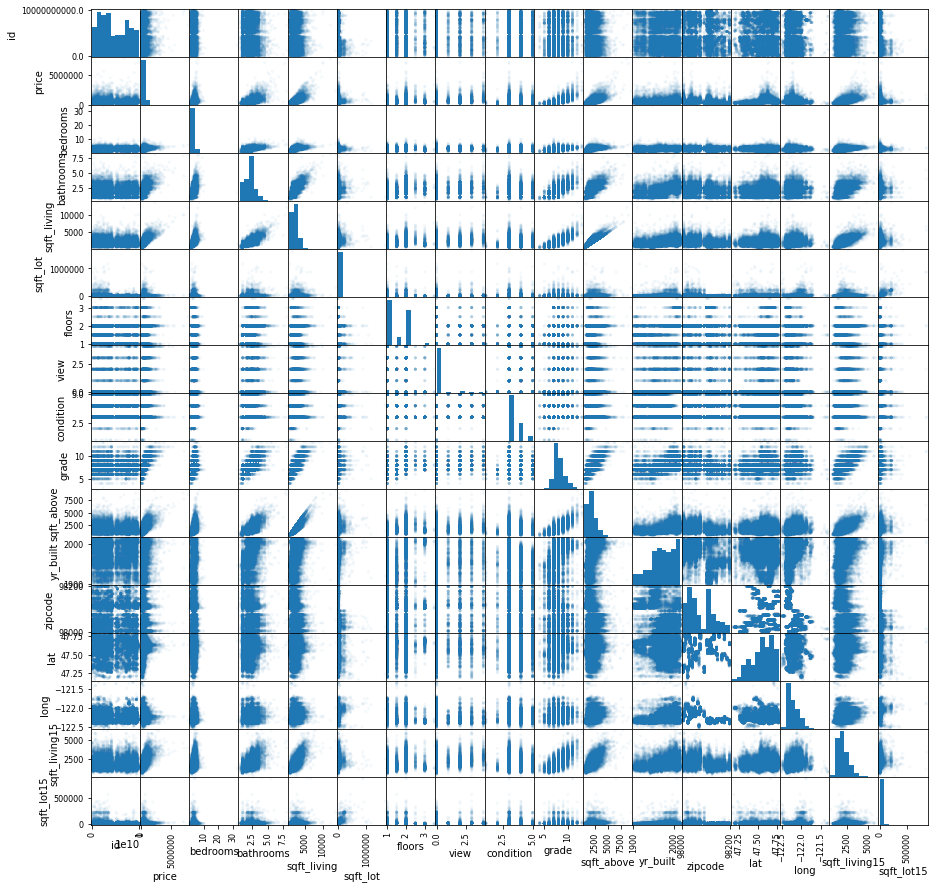

In [34]:
pd.plotting.scatter_matrix(df, alpha=0.05, figsize=[15,15]) #Let's look at the scatter plot of all the features
plt.show()

In [35]:
df.dtypes #From above and below, we can see that 'sqft_basement' did not plot and that it is an object.

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
view                    float64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement            object
yr_built                  int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [36]:
df['sqft_basement'].value_counts() #let's look at what values are in 'sqft_basement'

0.0       12688
?           450
600.0       215
500.0       206
700.0       205
          ...  
2330.0        1
2196.0        1
1798.0        1
295.0         1
588.0         1
Name: sqft_basement, Length: 302, dtype: int64

In [37]:
#Percent that is a 0 or 'No' from 'sqft_basement'
print(f'Percent of data that is 0 (i.e.\'No\'): {round(((df.sqft_basement.value_counts()[0]))/(len(df)-len(df[df.view.isna()])) * 100, 2)}%')
#Percent that is a 0 or ?
print(f'Percent of data that is either 0 (i.e.\'No\') or ?: {round((df.sqft_basement.value_counts()[0]+df.sqft_basement.value_counts()[1])/len(df) * 100, 2)}%')
#Percent that is value other than 0 or ?
other_values = sum([num for num in df.sqft_basement.value_counts() if num < 450])
print(f'Percent of data that is a value other than 0: {round((other_values)/(len(df)-len(df[df.sqft_basement.isna()])) * 100, 2)}%')

Percent of data that is 0 (i.e.'No'): 59.41%
Percent of data that is either 0 (i.e.'No') or ?: 61.52%
Percent of data that is a value other than 0: 38.48%


In [38]:
df['sqft_basement'] #there are a total of 21357 values.

16580    1310.0
13040     670.0
5632        0.0
15797       0.0
927       290.0
          ...  
7316        0.0
19661       0.0
6418        0.0
10689     670.0
4959      360.0
Name: sqft_basement, Length: 21357, dtype: object

From above, we notice that we need to handle the '?' and the large amount of 0 values. The first method we will try is by removing '?' and o values. The huge disadvantage to removing these is that we lose 61.52% of our data!

In [39]:
dfs = df.copy() #make a copy of df to see what would be the best method to clean up 'sqft_basement'

In [40]:
import scipy.stats as stats

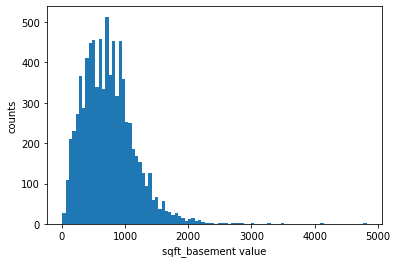

In [41]:
#Below we select only the values in 'sqft_basement that are not '?' nor 0.0 and plot these.
L1 = dfs[(df['sqft_basement'] != '?') & (df['sqft_basement'] != '0.0')].loc[:,'sqft_basement'].astype(float)
plt.xlabel('sqft_basement value')
plt.ylabel('counts')
plt.hist(L1, bins='auto')
plt.show()

From the above histogram plot, we can see that even with just the values, the distribution is not normaly distributed.

Let us see if we can get rid of outliers using Interquartile method, and then see our correlation vs 'price'.

In [42]:
def outlier_detection(datacolumn):
    '''
    Input ordered or unordered list of values. These values will be sorted, then quartile 1, 3 and IQR range will be determined.
    Returns lower_bound, and upper_bound of IQR.
    '''
    sorted(datacolumn)
    Q1, Q3 = np.percentile(datacolumn, [25, 75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5*IQR)
    upper_range = Q3 + (1.5*IQR)
    return lower_range, upper_range

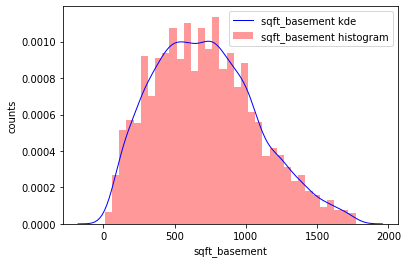

In [43]:
import seaborn as sns
lower_bound, upper_bound = outlier_detection(L1)
L1_new = [num for num in L1 if (num >= lower_bound) and (num <= upper_bound)] #filter out values that are below or above range
plt.xlabel('sqft_basement')
plt.ylabel('counts')
col = 'sqft_basement'
sns.distplot(L1_new, bins='auto', color='red', label=col+' histogram', kde=True, kde_kws={"color": "b", "lw": 1, "label":col+" kde"})
plt.show()

Now that our data is more normally distributed, let us see how highly 'price' correlates with 'sqft_basement' value:

In [44]:
#we again select only the values in 'sqft_basement that are not '?' nor 0.0 
dfs['sqft_basement'] = dfs[(df['sqft_basement'] != '?') & (df['sqft_basement'] != '0.0')].loc[:,'sqft_basement'].astype(float)

In [45]:
dfs['sqft_basement'] = dfs['sqft_basement'].map(lambda x: x if (x >= lower_bound) and (x <= upper_bound) else np.nan)

In [46]:
dfs.corr().loc['price', 'sqft_basement'] #pearson r

0.3234769497231239

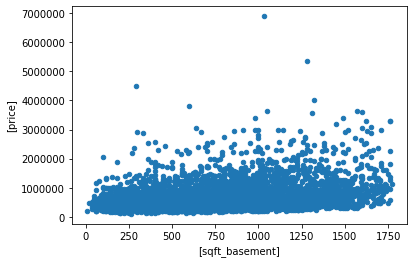

In [47]:
dfs.plot.scatter(x=['sqft_basement'], y=['price'])
plt.show()

We see from above 'sqft_basement' has a Pearson correlation of ~0.32 with 'price'; however, this is only relevant for less than 39% of our original data! In addition, we can visually see that correlation is weak.

Let us try looking at the correlation between 'price' and 'sqft_basement' from a different perspective: whether just having a basement (i.e. yes or no) increases price. We will do this by using Point-Biserial Correlation ([Resource 2](#Resources:))

In [48]:
dfe = df.copy()

In [49]:
# Below, we are converting any 'sqft_basement' values that are '?' or '0.0' to 0 and any value > 0 to 1.
dfe['sqft_basement'] = dfe['sqft_basement'].map(lambda x: 0 if (x == '?') or (x == '0.0') else x).astype(bool).astype(int)
dfe['sqft_basement'].value_counts() # we can check this is right by adding the number of 0.0 values with '?' values.

0    13138
1     8219
Name: sqft_basement, dtype: int64

In [50]:
from scipy.stats import pointbiserialr

# pbc of first question
pbc = pointbiserialr(dfe['sqft_basement'], dfe['price'])
print(pbc, '\nThe value above is equivalent to Pearson\'s Correlation Coefficent')

PointbiserialrResult(correlation=0.17761074092707388, pvalue=7.04077929653769e-151) 
The value above is equivalent to Pearson's Correlation Coefficent


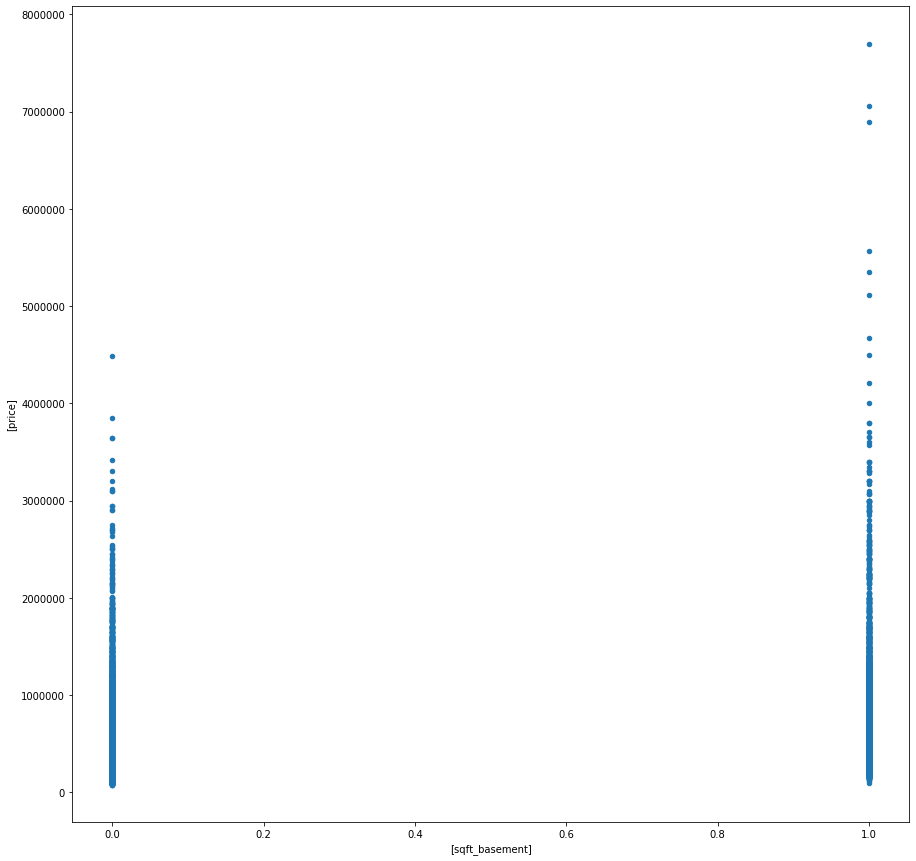

In [51]:
dfe.plot.scatter(x=['sqft_basement'], y=['price'], figsize=[15,15])
plt.show()

When all the data is considered in this way, we see an even weaker correlation between 'sqft_basement' and 'price'; however, this is representative of all the data prior to removing '?' and '0.0' values. As such, we will proceed with this method since it is more representative.

In [52]:
df = dfe # we accept the second method and change our df accordingly.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21357 entries, 16580 to 4959
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21357 non-null  int64         
 1   date           21357 non-null  datetime64[ns]
 2   price          21357 non-null  float64       
 3   bedrooms       21357 non-null  int64         
 4   bathrooms      21357 non-null  float64       
 5   sqft_living    21357 non-null  int64         
 6   sqft_lot       21357 non-null  int64         
 7   floors         21357 non-null  float64       
 8   view           21357 non-null  float64       
 9   condition      21357 non-null  int64         
 10  grade          21357 non-null  int64         
 11  sqft_above     21357 non-null  int64         
 12  sqft_basement  21357 non-null  int32         
 13  yr_built       21357 non-null  int64         
 14  zipcode        21357 non-null  int64         
 15  lat            2

To finish this section, we will formulate our two hypotheses

H_0:  

All of features are predictors of house price.
       
H_a:   

Some or all of features may be a predictor of house price.

## Feature Engineering
Moving on to '05', we are tasked with selecting important features and constructing more meaningful ones using our data.
### Multicollinearity of Features
Let us look at the all the features again on a scatter plot matrix to evaluate for multicollinearity; this is important because multicollinearity indicates that changes in one predictor are associated with changes in another one as well. Therefore, we need to be left with predictors that are independent from each other:

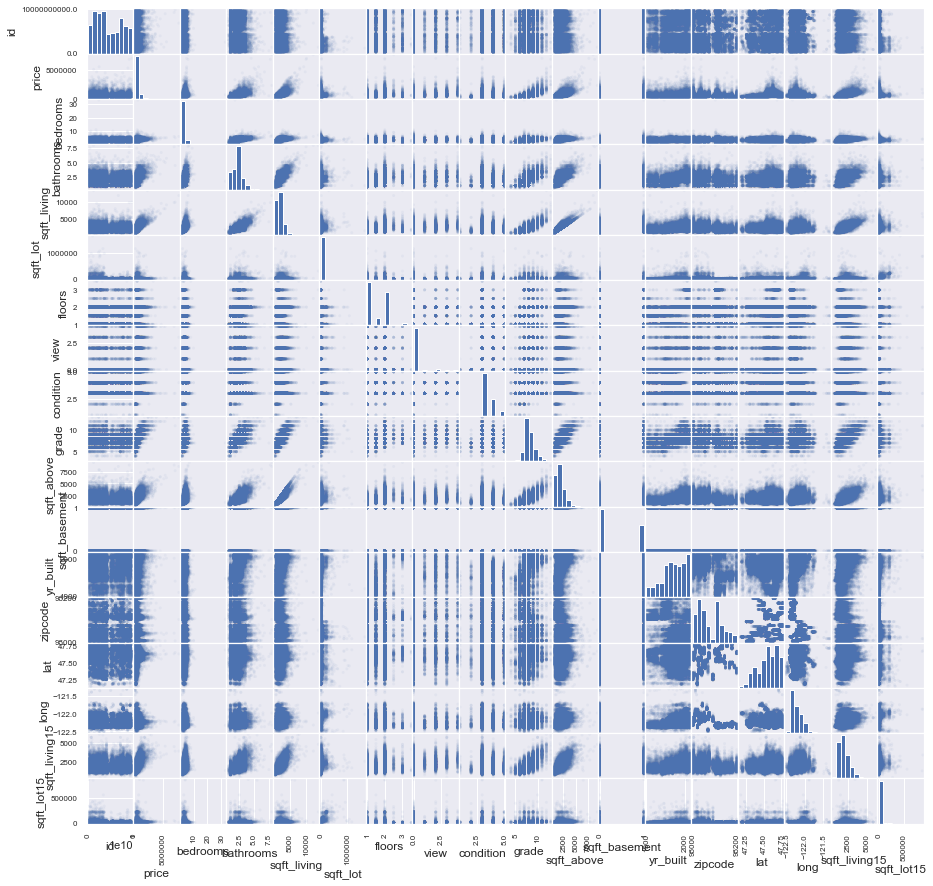

In [53]:
sns.set(context='notebook')
pd.plotting.scatter_matrix(df, alpha=0.05, figsize=[15,15]) #Let's look at the scatter plot of all the features
plt.show()

From above we can see that everything has plotted. Let us look at the heatmap next:

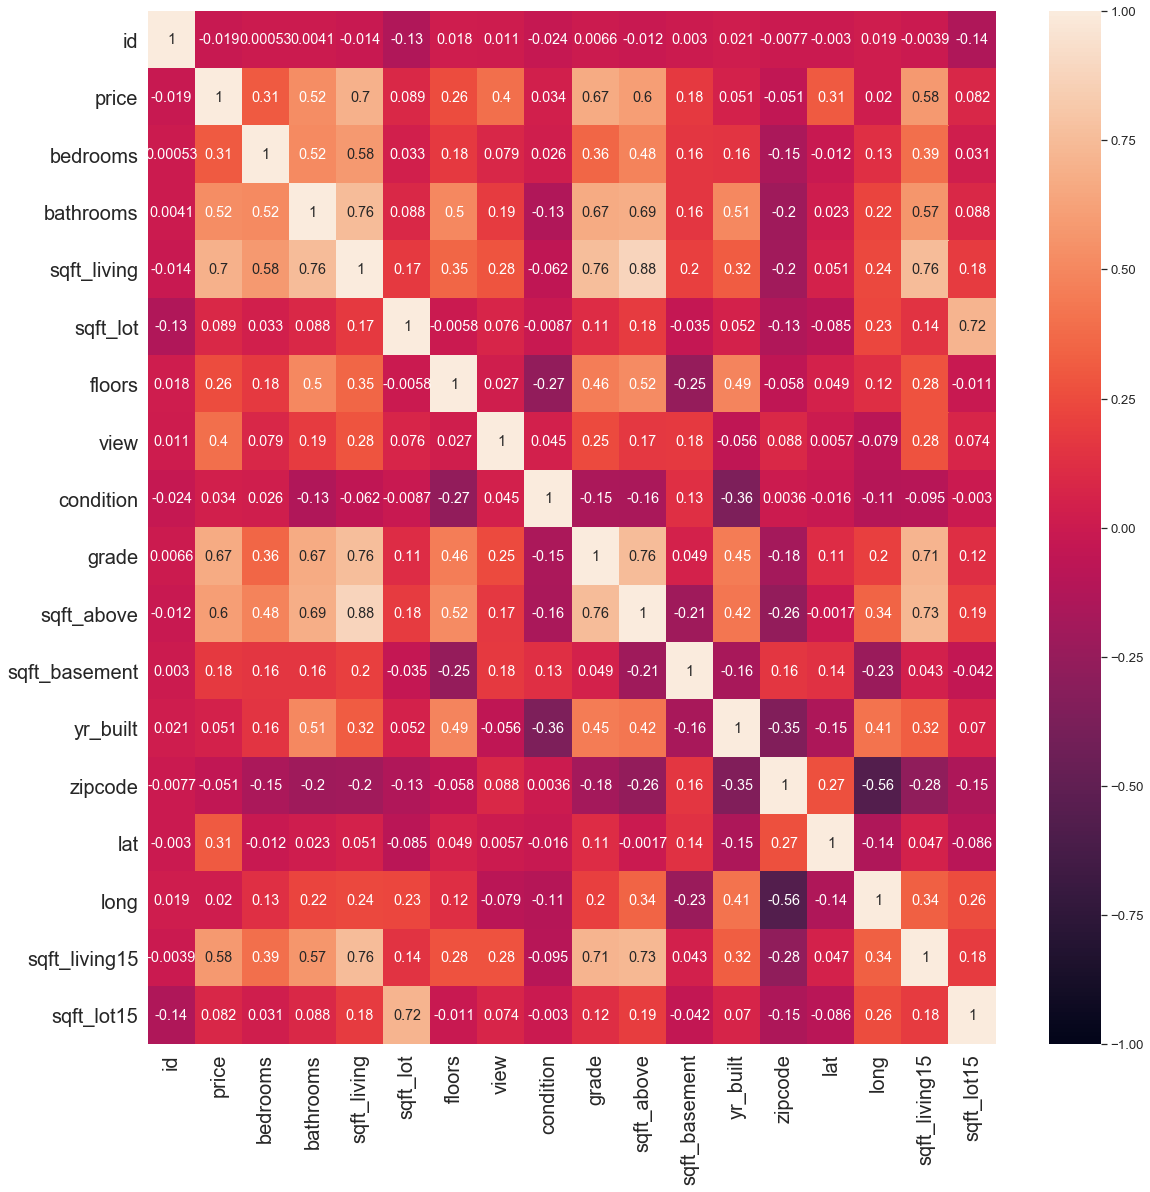

In [54]:
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.2)
plt.figure(figsize=[19,19])
ax = sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)
ax.set_yticklabels(ax.get_ymajorticklabels(), size=20)
ax.set_xticklabels(ax.get_xmajorticklabels(), size=20)
plt.show()

Next, we will make a comprehensive list of highly correlated pairs:

In [55]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking
dfex = df.corr().abs().stack().reset_index().sort_values(0, ascending=False) #stacks all values

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
dfex['pairs'] = list(zip(dfex.level_0, dfex.level_1))

# set index to pairs
dfex.set_index(['pairs'], inplace = True)
# drop level columns
dfex.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
dfex.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
dfex.drop_duplicates(inplace=True)

dfex[(dfex.cc>.75) & (dfex.cc<1)]

cc
pairs                                 
(sqft_living, sqft_above)     0.876640
(sqft_living, grade)          0.762092
(grade, sqft_above)           0.756126
(sqft_living15, sqft_living)  0.755991
(sqft_living, bathrooms)      0.755037

In [56]:
df_MC = df.copy()

We can select any features to drop so that there is not multicollinearity.

In [57]:
df_MC.drop(columns = ['sqft_living', 'sqft_above'], inplace=True)

In [58]:
df_MC

id       date      price  bedrooms  bathrooms  sqft_lot  \
16580  9106000005 2015-05-27  1310000.0         4       2.25      5000   
13040  5101400871 2015-05-24   445500.0         2       1.75      6670   
5632   7923600250 2015-05-15   450000.0         5       2.00      7344   
15797  7129304540 2015-05-14   440000.0         5       2.00      5600   
927    8730000270 2015-05-14   359000.0         2       2.75      1140   
...           ...        ...        ...       ...        ...       ...   
7316   2202500290 2014-05-02   435000.0         4       1.00      8800   
19661  7853220390 2014-05-02   785000.0         5       3.25     11995   
6418   2011000010 2014-05-02   257950.0         3       1.75      5858   
10689  2738600140 2014-05-02   499950.0         4       2.50      3345   
4959   7525000080 2014-05-02   588500.0         3       1.75     14892   

       floors  view  condition  grade  sqft_basement  yr_built  zipcode  \
16580     2.0   0.0          5      8              1      1924    98115   
13040     1.0   0.0          3      6              1      1941    98115   
5632      1.5   0.0          3      7              0      1960    98007   
15797     1.5   0.0          3      6              0      1947    98118   
927       2.0   0.0          3      8              1      2009    98133   
...       ...   ...        ...    ...            ...       ...      ...   
7316      1.0   0.0          4      7              0      1954    98006   
19661     2.0   2.0          3     10              0      2006    98065   
6418      1.0   0.0          3      7              0      1987    98198   
10689     2.0   0.0          3      8              1      2004    98072   
4959      1.0   0.0          3      8              1      1980    98074   

           lat     long  sqft_living15  sqft_lot15  
16580  47.6747 -122.303           2170        4590  
13040  47.6914 -122.308            920        6380  
5632   47.5951 -122.144           1870        7650  
15797  47.5192 -122.266           1860        5980  
927    47.7052 -122.343           1370        1090  
...        ...      ...            ...         ...  
7316   47.5746 -122.135           1260        8942  
19661  47.5337 -121.860           3320       11241  
6418   47.3815 -122.313           1400        7500  
10689  47.7735 -122.158           2860        3596  
4959   47.6267 -122.046           2570       14217  

[21357 rows x 17 columns]

In [59]:
df_MC.describe()

id         price      bedrooms     bathrooms      sqft_lot  \
count  2.135700e+04  2.135700e+04  21357.000000  21357.000000  2.135700e+04   
mean   4.582834e+09  5.416252e+05      3.373788      2.118322  1.511924e+04   
std    2.876805e+09  3.662398e+05      0.925514      0.768334  4.149855e+04   
min    1.000102e+06  7.800000e+04      1.000000      0.500000  5.200000e+02   
25%    2.124049e+09  3.249500e+05      3.000000      1.750000  5.040000e+03   
50%    3.904940e+09  4.500000e+05      3.000000      2.250000  7.613000e+03   
75%    7.312000e+09  6.450000e+05      4.000000      2.500000  1.069600e+04   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  1.651359e+06   

             floors          view     condition         grade  sqft_basement  \
count  21357.000000  21357.000000  21357.000000  21357.000000   21357.000000   
mean       1.496020      0.234677      3.410685      7.662312       0.384839   
std        0.540206      0.766459      0.650143      1.171407       0.486569   
min        1.000000      0.000000      1.000000      3.000000       0.000000   
25%        1.000000      0.000000      3.000000      7.000000       0.000000   
50%        1.500000      0.000000      3.000000      7.000000       0.000000   
75%        2.000000      0.000000      4.000000      8.000000       1.000000   
max        3.500000      4.000000      5.000000     13.000000       1.000000   

           yr_built       zipcode           lat          long  sqft_living15  \
count  21357.000000  21357.000000  21357.000000  21357.000000   21357.000000   
mean    1971.095894  98077.861544     47.560285   -122.213749    1988.066255   
std       29.387983     53.470865      0.138566      0.140802     685.428458   
min     1900.000000  98001.000000     47.155900   -122.519000     399.000000   
25%     1952.000000  98033.000000     47.471300   -122.328000    1490.000000   
50%     1975.000000  98065.000000     47.572200   -122.230000    1840.000000   
75%     1997.000000  98117.000000     47.678100   -122.125000    2370.000000   
max     2015.000000  98199.000000     47.777600   -121.315000    6210.000000   

          sqft_lot15  
count   21357.000000  
mean    12768.505876  
std     27326.770308  
min       651.000000  
25%      5100.000000  
50%      7620.000000  
75%     10087.000000  
max    871200.000000

### Scaling and Standardization of Variables
From the above heatmap, we can get an idea which feature correlates or has a somewhat linear relationship with price. The closer to 1 (or -1) the more highly correlated that feature is to 'price'. The features closest to zero indicate that we may be able to drop those features. Let us look more closely at those closest to zero and continuous and see if they are normally distributed which is the second assumption for linear regression:

Note: price is included for reference.

In [60]:
df_stand = df_MC.copy()
df_stand = df_stand[[ 'price', 'sqft_lot', 'lat', 'sqft_living15', 'sqft_lot15']]
df_stand

price  sqft_lot      lat  sqft_living15  sqft_lot15
16580  1310000.0      5000  47.6747           2170        4590
13040   445500.0      6670  47.6914            920        6380
5632    450000.0      7344  47.5951           1870        7650
15797   440000.0      5600  47.5192           1860        5980
927     359000.0      1140  47.7052           1370        1090
...          ...       ...      ...            ...         ...
7316    435000.0      8800  47.5746           1260        8942
19661   785000.0     11995  47.5337           3320       11241
6418    257950.0      5858  47.3815           1400        7500
10689   499950.0      3345  47.7735           2860        3596
4959    588500.0     14892  47.6267           2570       14217

[21357 rows x 5 columns]

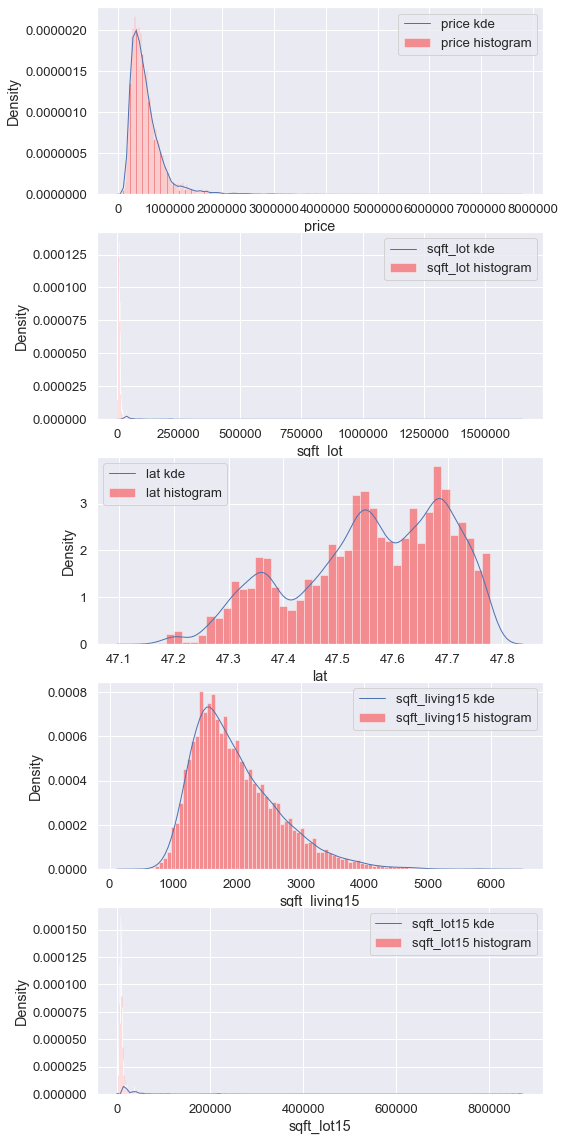

In [61]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8,20))
sns.set_style('darkgrid')
for i, col in enumerate(df_stand.columns):
    sns.distplot(df_stand[col], bins='auto', color='red', ax=axes[i], label=col+' histogram', kde=True, kde_kws={"color": "b", "lw": 1, "label":col+" kde"})
    axes[i].set_ylabel('Density')
    axes[i].legend()

plt.show()

So far, none of the above features appear to be evenly distributed besides 'sqft_living15'. Let us try applying the log to our data to see if this changes the distribution.

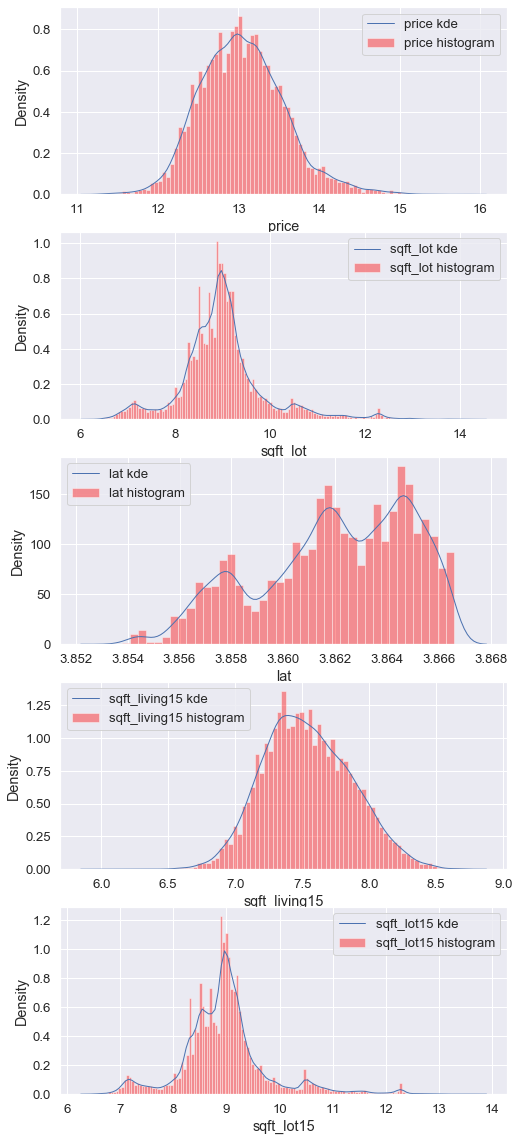

In [62]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8,20))
sns.set_style('darkgrid')
for i, col in enumerate(df_stand.columns):
    sns.distplot(np.log(np.abs(df_stand[col])), bins='auto', color='red', ax=axes[i], label=col+' histogram', kde=True, kde_kws={"color": "b", "lw": 1, "label":col+" kde"})
    axes[i].set_ylabel('Density')
    axes[i].legend()

plt.show()

Now, most of our data is fairly evenly distributed. Finally, we will standardize the data so that we can compare all the features to each other.

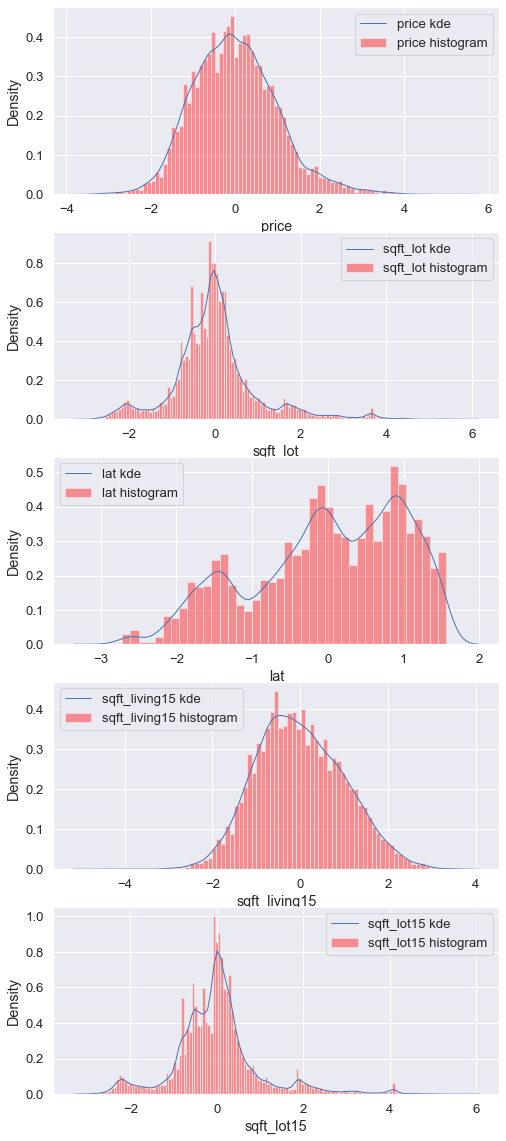

In [63]:
def standardize(feature):
    '''
    standardizes the feature between some - value and + value
    '''
    return (feature - feature.mean()) / feature.std()

log_feats = np.log(np.abs(df_stand))
#log_feats.long = log_feats.long * -1
features_final = log_feats.apply(standardize)

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8,20))
sns.set_style('darkgrid')
for i, col in enumerate(df_stand.columns):
    sns.distplot(features_final[col], bins='auto', color='red', ax=axes[i], label=col+' histogram', kde=True, kde_kws={"color": "b", "lw": 1, "label":col+" kde"})
    axes[i].set_ylabel('Density')
    axes[i].legend()

plt.show()

In [64]:
df_trans = df_MC.copy()
df_trans[['price', 'sqft_lot', 'lat', 'sqft_living15', 'sqft_lot15']] = features_final
df_trans

id       date     price  bedrooms  bathrooms  sqft_lot  floors  \
16580  9106000005 2015-05-27  1.973785         4       2.25 -0.522390     2.0   
13040  5101400871 2015-05-24 -0.086294         2       1.75 -0.203622     1.0   
5632   7923600250 2015-05-15 -0.067098         5       2.00 -0.097142     1.5   
15797  7129304540 2015-05-14 -0.110021         5       2.00 -0.397033     1.5   
927    8730000270 2015-05-14 -0.498611         2       2.75 -2.157707     2.0   
...           ...        ...       ...       ...        ...       ...     ...   
7316   2202500290 2014-05-02 -0.131850         4       1.00  0.102922     1.0   
19661  7853220390 2014-05-02  0.995685         5       3.25  0.445534     2.0   
6418   2011000010 2014-05-02 -1.129969         3       1.75 -0.347211     1.0   
10689  2738600140 2014-05-02  0.133948         4       2.50 -0.967024     2.0   
4959   7525000080 2014-05-02  0.445406         3       1.75  0.684828     1.0   

       view  condition  grade  sqft_basement  yr_built  zipcode       lat  \
16580   0.0          5      8              1      1924    98115  0.825582   
13040   0.0          3      6              1      1941    98115  0.945706   
5632    0.0          3      7              0      1960    98007  0.252437   
15797   0.0          3      6              0      1947    98118 -0.294960   
927     0.0          3      8              1      2009    98133  1.044938   
...     ...        ...    ...            ...       ...      ...       ...   
7316    0.0          4      7              0      1954    98006  0.104675   
19661   2.0          3     10              0      2006    98065 -0.190317   
6418    0.0          3      7              0      1987    98198 -1.290300   
10689   0.0          3      8              1      2004    98072  1.535643   
4959    0.0          3      8              1      1980    98074  0.480082   

          long  sqft_living15  sqft_lot15  
16580 -122.303       0.434406   -0.649412  
13040 -122.308      -2.186340   -0.244901  
5632  -122.144      -0.020009   -0.021893  
15797 -122.266      -0.036385   -0.324440  
927   -122.343      -0.970222   -2.415542  
...        ...            ...         ...  
7316  -122.135      -1.225847    0.169809  
19661 -121.860       1.733122    0.450887  
6418  -122.313      -0.904066   -0.046220  
10689 -122.158       1.277625   -0.949222  
4959  -122.046       0.951094    0.739411  

[21357 rows x 17 columns]

### Identifying Categorical Variables
Before moving to the next section, we must first identify which of the columns in our data are categorical variables with respect to 'price'. Let us start by dropping our known continuous variables and variables we cannot use:

In [65]:
df_cat = df_trans.copy()

In [66]:
df_cat.drop(labels=['id', 'date', 'sqft_lot', 'lat', 'sqft_living15', 'sqft_lot15'], axis=1, inplace=True)
df_cat #check to see if we dropped things well

price  bedrooms  bathrooms  floors  view  condition  grade  \
16580  1.973785         4       2.25     2.0   0.0          5      8   
13040 -0.086294         2       1.75     1.0   0.0          3      6   
5632  -0.067098         5       2.00     1.5   0.0          3      7   
15797 -0.110021         5       2.00     1.5   0.0          3      6   
927   -0.498611         2       2.75     2.0   0.0          3      8   
...         ...       ...        ...     ...   ...        ...    ...   
7316  -0.131850         4       1.00     1.0   0.0          4      7   
19661  0.995685         5       3.25     2.0   2.0          3     10   
6418  -1.129969         3       1.75     1.0   0.0          3      7   
10689  0.133948         4       2.50     2.0   0.0          3      8   
4959   0.445406         3       1.75     1.0   0.0          3      8   

       sqft_basement  yr_built  zipcode     long  
16580              1      1924    98115 -122.303  
13040              1      1941    98115 -122.308  
5632               0      1960    98007 -122.144  
15797              0      1947    98118 -122.266  
927                1      2009    98133 -122.343  
...              ...       ...      ...      ...  
7316               0      1954    98006 -122.135  
19661              0      2006    98065 -121.860  
6418               0      1987    98198 -122.313  
10689              1      2004    98072 -122.158  
4959               1      1980    98074 -122.046  

[21357 rows x 11 columns]

In [67]:
#we check to see if mean is close to 50% for each column to tell us if there are still outliers.
df_cat.describe()

price      bedrooms     bathrooms        floors          view  \
count  2.135700e+04  21357.000000  21357.000000  21357.000000  21357.000000   
mean  -2.642951e-15      3.373788      2.118322      1.496020      0.234677   
std    1.000000e+00      0.925514      0.768334      0.540206      0.766459   
min   -3.414417e+00      1.000000      0.500000      1.000000      0.000000   
25%   -6.889432e-01      3.000000      1.750000      1.000000      0.000000   
50%   -6.709814e-02      3.000000      2.250000      1.500000      0.000000   
75%    6.205009e-01      4.000000      2.500000      2.000000      0.000000   
max    5.356734e+00     33.000000      8.000000      3.500000      4.000000   

          condition         grade  sqft_basement      yr_built       zipcode  \
count  21357.000000  21357.000000   21357.000000  21357.000000  21357.000000   
mean       3.410685      7.662312       0.384839   1971.095894  98077.861544   
std        0.650143      1.171407       0.486569     29.387983     53.470865   
min        1.000000      3.000000       0.000000   1900.000000  98001.000000   
25%        3.000000      7.000000       0.000000   1952.000000  98033.000000   
50%        3.000000      7.000000       0.000000   1975.000000  98065.000000   
75%        4.000000      8.000000       1.000000   1997.000000  98117.000000   
max        5.000000     13.000000       1.000000   2015.000000  98199.000000   

               long  
count  21357.000000  
mean    -122.213749  
std        0.140802  
min     -122.519000  
25%     -122.328000  
50%     -122.230000  
75%     -122.125000  
max     -121.315000

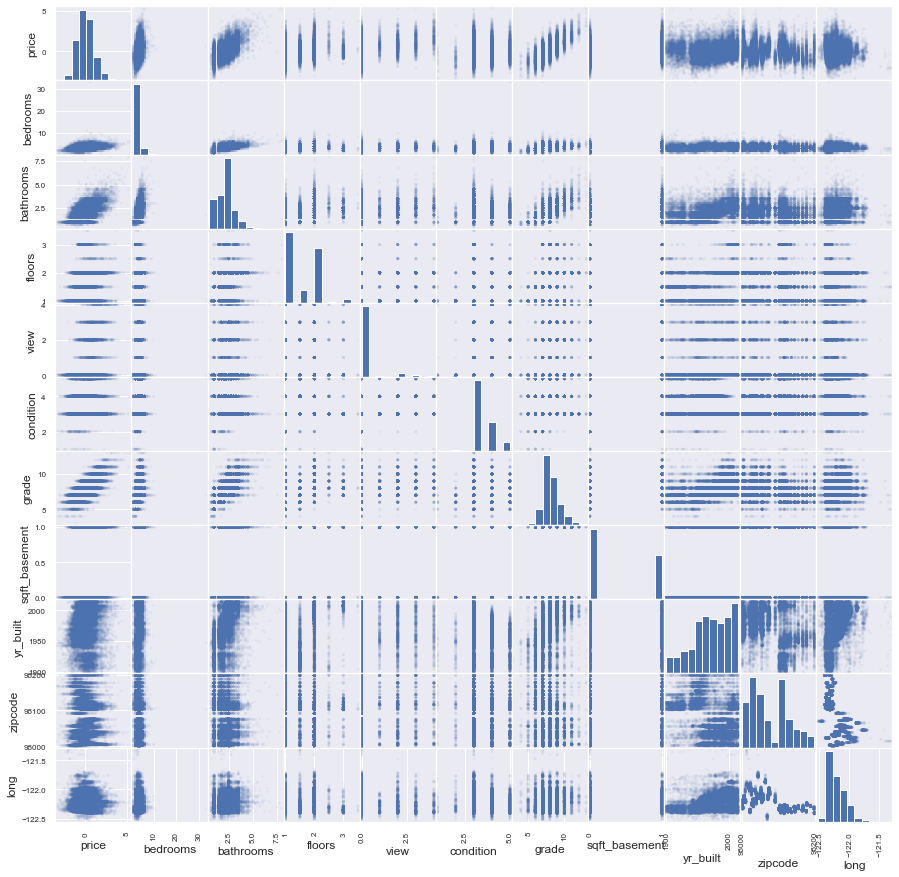

In [68]:
#From here we can get a better look at if they are categorical with respect to 'price'
sns.set(context='notebook', style='darkgrid')
pd.plotting.scatter_matrix(df_cat, alpha=0.05, figsize=[15,15]) #Let's look at the scatter plot of all the features
plt.show()

From the above scatter plots, we can see that all are categorical variables except maybe 'bedrooms', 'bathrooms', 'yr_built', 'zipcode', and 'long' 

Let us take a closer look at 'bedrooms' and group all values in the data by number of rooms:

In [69]:
df_cat.groupby('bedrooms').describe() #groups bedroom number and gets stats description

price                                                              \
           count      mean       std       min       25%       50%       75%   
bedrooms                                                                       
1          191.0 -0.897398  0.873312 -3.366061 -1.357132 -0.809959 -0.328253   
2         2730.0 -0.475836  0.865851 -3.414417 -1.035503 -0.415329  0.095552   
3         9698.0 -0.211540  0.883207 -3.162438 -0.847907 -0.221748  0.350594   
4         6832.0  0.328271  0.973983 -2.939860 -0.400110  0.316179  0.946393   
5         1581.0  0.653415  1.098920 -2.059549 -0.110021  0.544998  1.288372   
6          263.0  0.702913  1.109233 -1.664416 -0.084210  0.671632  1.256801   
7           38.0  0.946113  1.206273 -0.973305  0.278478  0.853223  1.352979   
8           13.0  1.149740  1.392614 -0.602470  0.095552  0.776795  2.414510   
9            6.0  1.091653  0.847227 -0.067098  0.555974  1.052211  1.779059   
10           3.0  1.008214  0.620910  0.635250  0.649830  0.664410  1.194696   
11           1.0  0.209050       NaN  0.209050  0.209050  0.209050  0.209050   
33           1.0  0.605637       NaN  0.605637  0.605637  0.605637  0.605637   

                   bathrooms            ...  zipcode             long  \
               max     count      mean  ...      75%      max   count   
bedrooms                                ...                             
1         1.884238     191.0  1.081152  ...  98129.5  98199.0   191.0   
2         3.726798    2730.0  1.402839  ...  98133.0  98199.0  2730.0   
3         4.007867    9698.0  1.970870  ...  98117.0  98199.0  9698.0   
4         4.326551    6832.0  2.437903  ...  98112.0  98199.0  6832.0   
5         5.190994    1581.0  2.781942  ...  98115.0  98199.0  1581.0   
6         5.356734     263.0  3.082700  ...  98118.0  98199.0   263.0   
7         3.679636      38.0  3.651316  ...  98121.0  98199.0    38.0   
8         3.738409      13.0  3.557692  ...  98112.0  98133.0    13.0   
9         2.100694       6.0  4.416667  ...  98105.0  98144.0     6.0   
10        1.724981       3.0  3.416667  ...  98055.5  98105.0     3.0   
11        0.209050       1.0  3.000000  ...  98106.0  98106.0     1.0   
33        0.605637       1.0  1.750000  ...  98103.0  98103.0     1.0   

                                                                        \
                mean       std      min        25%      50%        75%   
bedrooms                                                                 
1        -122.261550  0.172351 -122.472 -122.36350 -122.316 -122.25800   
2        -122.278490  0.131677 -122.512 -122.36200 -122.316 -122.25725   
3        -122.213136  0.144541 -122.519 -122.33100 -122.231 -122.12425   
4        -122.189123  0.134450 -122.504 -122.30000 -122.192 -122.10075   
5        -122.200461  0.123170 -122.507 -122.29800 -122.208 -122.12400   
6        -122.239441  0.109806 -122.408 -122.32400 -122.269 -122.16100   
7        -122.240711  0.117085 -122.392 -122.33075 -122.282 -122.15375   
8        -122.268769  0.067218 -122.363 -122.31400 -122.303 -122.21100   
9        -122.311333  0.017328 -122.338 -122.32025 -122.308 -122.30250   
10       -122.202667  0.106237 -122.320 -122.24750 -122.175 -122.14400   
11       -122.363000       NaN -122.363 -122.36300 -122.363 -122.36300   
33       -122.331000       NaN -122.331 -122.33100 -122.331 -122.33100   

                   
              max  
bedrooms           
1        -121.315  
2        -121.316  
3        -121.315  
4        -121.691  
5        -121.718  
6        -121.869  
7        -121.986  
8        -122.131  
9        -122.289  
10       -122.113  
11       -122.363  
33       -122.331  

[12 rows x 80 columns]

In [70]:
df_cat.groupby('bedrooms').mean() #isolates just the mean from the above table

price  bathrooms    floors      view  condition     grade  \
bedrooms                                                                 
1        -0.897398   1.081152  1.154450  0.256545   3.277487  6.130890   
2        -0.475836   1.402839  1.308425  0.179121   3.379487  6.874359   
3        -0.211540   1.970870  1.451691  0.189730   3.417199  7.477109   
4         0.328271   2.437903  1.617169  0.266247   3.405299  8.117681   
5         0.653415   2.781942  1.580961  0.409235   3.449715  8.280835   
6         0.702913   3.082700  1.608365  0.547529   3.486692  8.102662   
7         0.946113   3.651316  1.723684  0.500000   3.447368  8.447368   
8         1.149740   3.557692  1.692308  0.230769   3.538462  8.076923   
9         1.091653   4.416667  2.166667  0.000000   3.000000  7.833333   
10        1.008214   3.416667  1.666667  0.666667   3.666667  7.666667   
11        0.209050   3.000000  2.000000  0.000000   3.000000  7.000000   
33        0.605637   1.750000  1.000000  0.000000   5.000000  7.000000   

          sqft_basement     yr_built       zipcode        long  
bedrooms                                                        
1              0.157068  1942.528796  98104.408377 -122.261550  
2              0.287179  1955.518681  98105.884249 -122.278490  
3              0.356156  1971.924727  98076.404826 -122.213136  
4              0.408665  1976.628513  98069.710919 -122.189123  
5              0.595825  1974.359899  98069.958887 -122.200461  
6              0.669202  1962.878327  98078.806084 -122.239441  
7              0.526316  1962.842105  98085.815789 -122.240711  
8              0.846154  1956.307692  98081.846154 -122.268769  
9              0.833333  1931.666667  98110.666667 -122.311333  
10             1.000000  1959.666667  98038.333333 -122.202667  
11             1.000000  1918.000000  98106.000000 -122.363000  
33             1.000000  1947.000000  98103.000000 -122.331000

In [71]:
df_cat.groupby('bedrooms').mean()['price'] #selects the mean price of houses

bedrooms
1    -0.897398
2    -0.475836
3    -0.211540
4     0.328271
5     0.653415
6     0.702913
7     0.946113
8     1.149740
9     1.091653
10    1.008214
11    0.209050
33    0.605637
Name: price, dtype: float64

In [72]:
df_cat.groupby('bedrooms').mean()['price'].sort_values() #sorts values in increasing order

bedrooms
1    -0.897398
2    -0.475836
3    -0.211540
11    0.209050
4     0.328271
33    0.605637
5     0.653415
6     0.702913
7     0.946113
10    1.008214
9     1.091653
8     1.149740
Name: price, dtype: float64

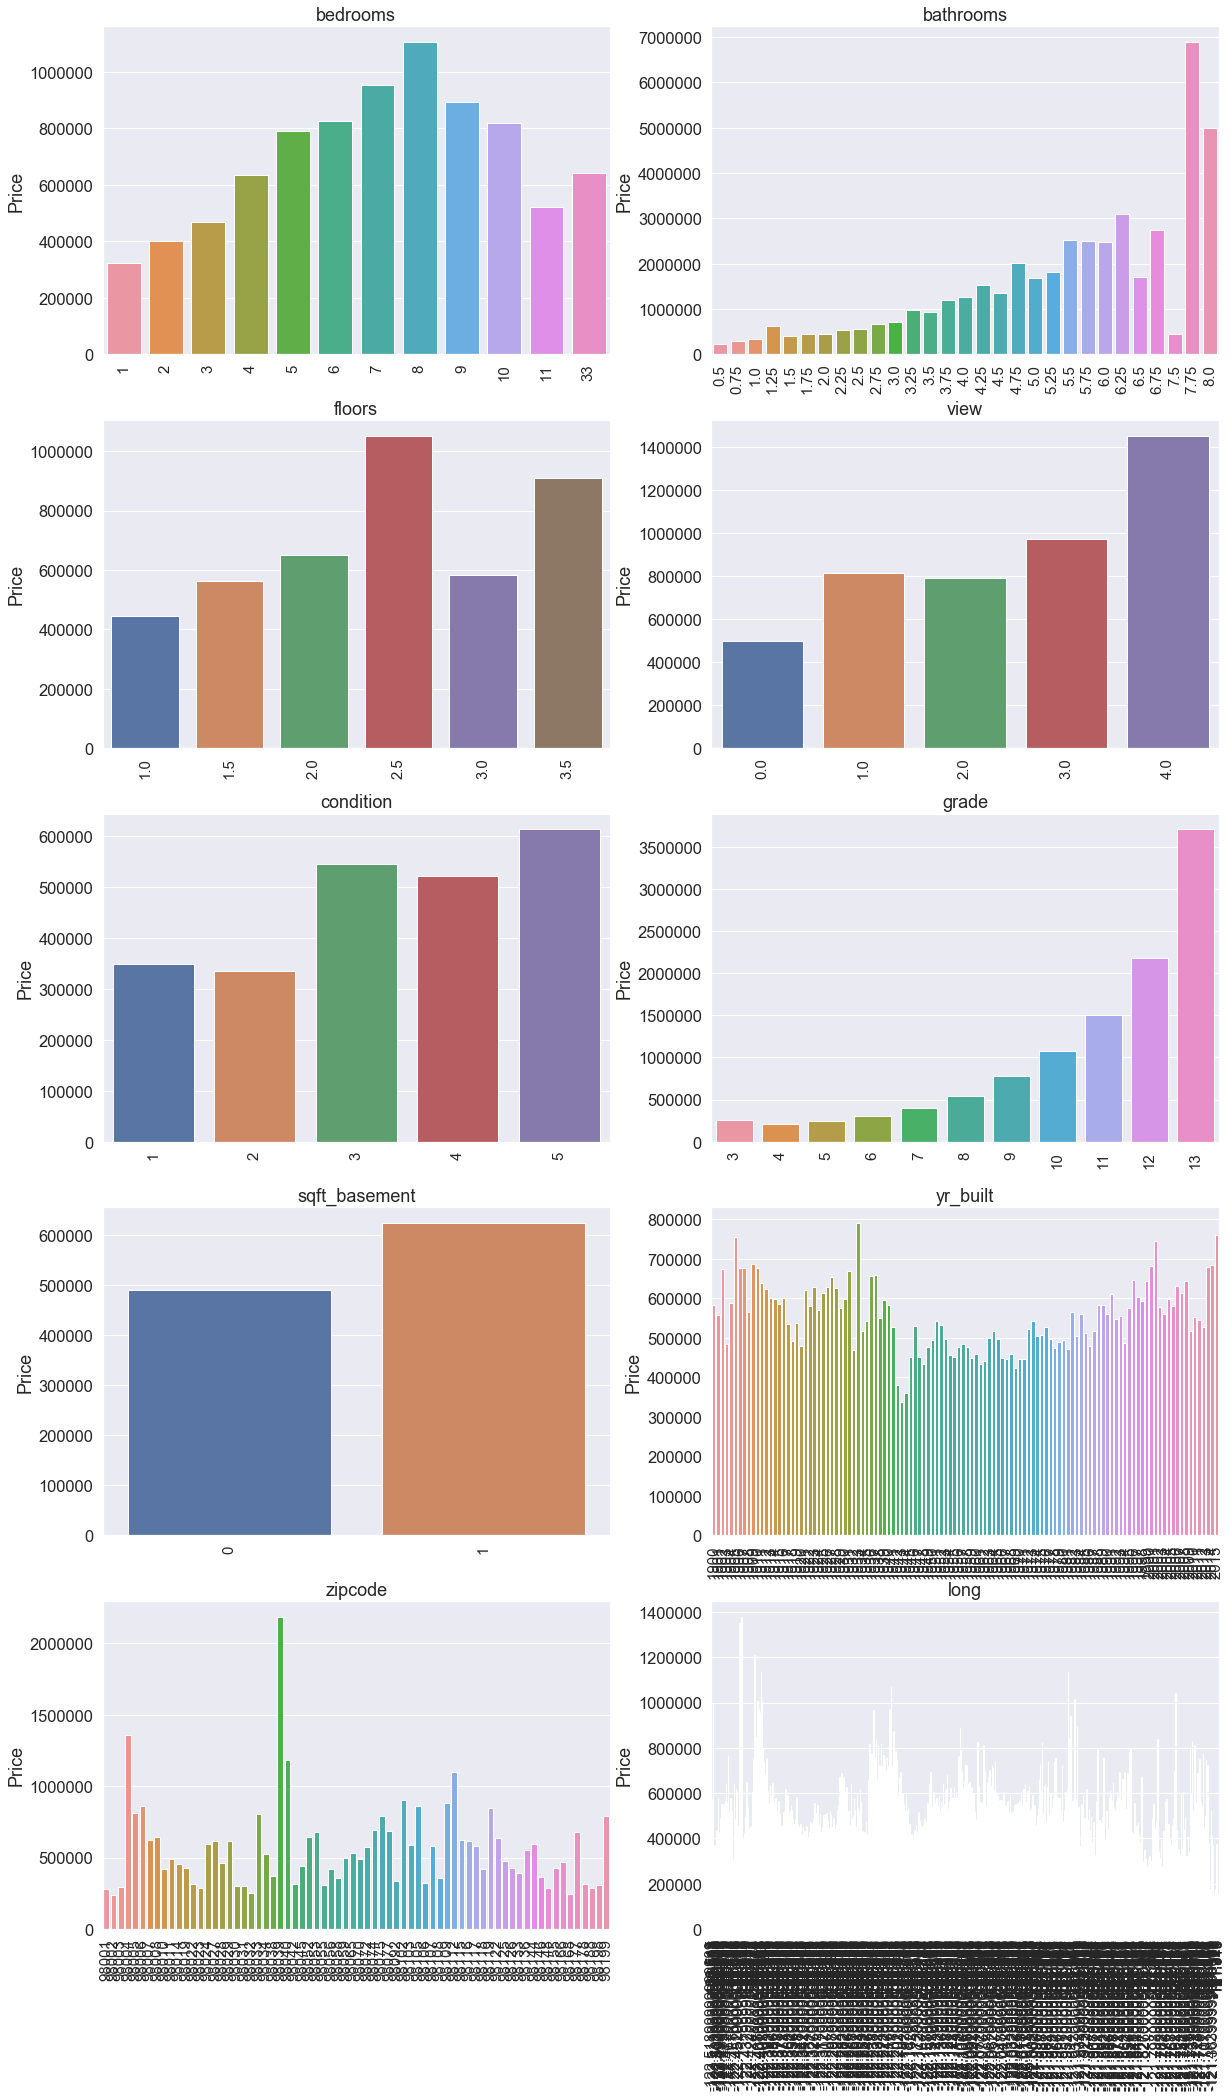

In [73]:
# Create bar plots to identify more clearly which categories within each variable influence 'price' 
columns = ['bedrooms', 'bathrooms', 'floors', 'view', 'condition', 'grade', 'sqft_basement', 'yr_built', 'zipcode', 'long']
sns.set(context='notebook', style='darkgrid', font_scale=1.5)
fig, axes = plt.subplots(figsize=(20, 35), nrows=5, ncols=2)
for column, axe in zip(columns, axes.flatten()):
    data1 = df_MC.groupby(column).mean()['price'].sort_values()
    y=list(data1.values)
    x=list(data1.index)
    sns.barplot(x=x, y=y, ci=False, ax=axe)
    axe.set_title(column)
    axe.set_ylabel('Price')
    xaxis = axe.get_xticklabels()
    axe.set_xticklabels(labels=xaxis, rotation=90, fontsize=15)
    
plt.show()


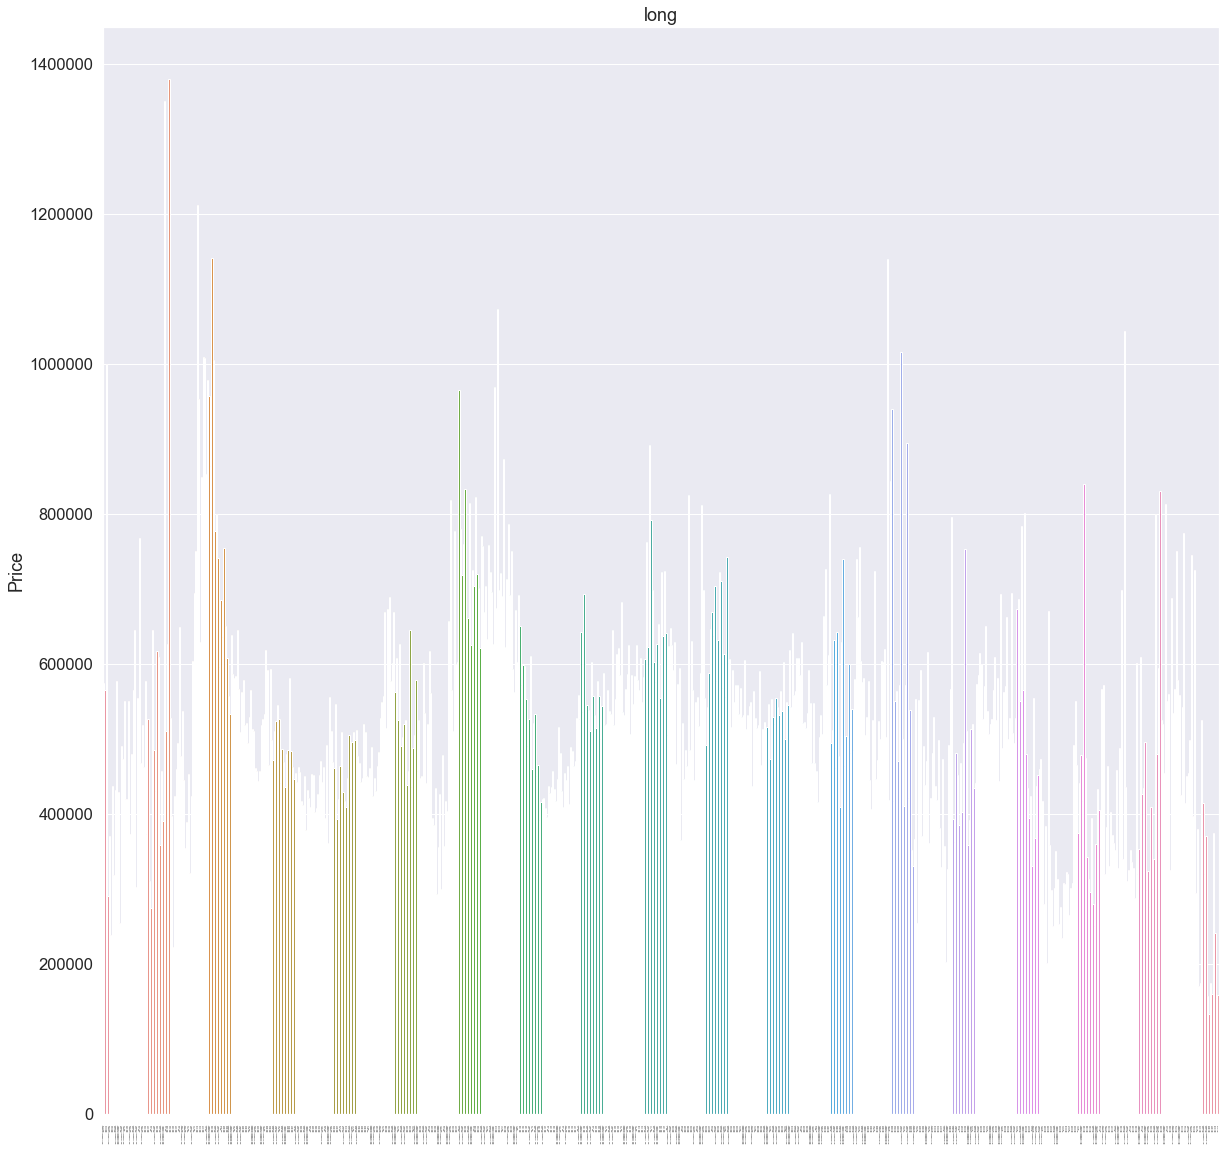

In [74]:
sns.set(context='notebook', style='darkgrid', font_scale=1.5)
plt.figure(figsize=(20, 20))

data1 = df_MC.groupby('long').mean()['price'].sort_values()
y=list(data1.values)
x=list(data1.index)
axe = sns.barplot(x=x, y=y, ci=False)
axe.set_title('long')
axe.set_ylabel('Price')
xaxis = axe.get_xticklabels()
axe.set_xticklabels(labels=xaxis, rotation=90, fontsize=2)
    
plt.show()

From the above bar graphs and scatter plot, we confirm that all the above features are categorical.
### Transforming Categorical Variables
Next, we will go ahead and transform all our categorical variables. From our bar graphs, we saw that 'long' looks like it could be more continuous, so we took it out for two of our dummy sets. 'yr_built' may also be beneficial to take out, so we will leave it in 2/3 dummies.

In [75]:
# below we select which variables we want dummies for
catvar1 = ['bedrooms', 'bathrooms', 'floors', 'view', 'condition', 'grade', 'sqft_basement', 'yr_built', 'zipcode', 'long']
dummies1 = pd.get_dummies(df_cat[catvar1], prefix=catvar1, columns=catvar1, drop_first=True)
dummies1

bedrooms_2  bedrooms_3  bedrooms_4  bedrooms_5  bedrooms_6  bedrooms_7  \
16580           0           0           1           0           0           0   
13040           1           0           0           0           0           0   
5632            0           0           0           1           0           0   
15797           0           0           0           1           0           0   
927             1           0           0           0           0           0   
...           ...         ...         ...         ...         ...         ...   
7316            0           0           1           0           0           0   
19661           0           0           0           1           0           0   
6418            0           1           0           0           0           0   
10689           0           0           1           0           0           0   
4959            0           1           0           0           0           0   

       bedrooms_8  bedrooms_9  bedrooms_10  bedrooms_11  ...  \
16580           0           0            0            0  ...   
13040           0           0            0            0  ...   
5632            0           0            0            0  ...   
15797           0           0            0            0  ...   
927             0           0            0            0  ...   
...           ...         ...          ...          ...  ...   
7316            0           0            0            0  ...   
19661           0           0            0            0  ...   
6418            0           0            0            0  ...   
10689           0           0            0            0  ...   
4959            0           0            0            0  ...   

       long_-121.40299999999999  long_-121.402  long_-121.36399999999999  \
16580                         0              0                         0   
13040                         0              0                         0   
5632                          0              0                         0   
15797                         0              0                         0   
927                           0              0                         0   
...                         ...            ...                       ...   
7316                          0              0                         0   
19661                         0              0                         0   
6418                          0              0                         0   
10689                         0              0                         0   
4959                          0              0                         0   

       long_-121.359  long_-121.352  long_-121.325  long_-121.321  \
16580              0              0              0              0   
13040              0              0              0              0   
5632               0              0              0              0   
15797              0              0              0              0   
927                0              0              0              0   
...              ...            ...            ...            ...   
7316               0              0              0              0   
19661              0              0              0              0   
6418               0              0              0              0   
10689              0              0              0              0   
4959               0              0              0              0   

       long_-121.319  long_-121.316  long_-121.315  
16580              0              0              0  
13040              0              0              0  
5632               0              0              0  
15797              0              0              0  
927                0              0              0  
...              ...            ...            ...  
7316               0              0              0  
19661              0              0              0  
6418               0              0           

In [76]:
# below we drop the original values, so we can replace them with their dummy value equivalent
preprocessed1 = df_trans.drop(['bedrooms', 'bathrooms', 'floors', 'view', 'condition', 'grade', 'sqft_basement', 'yr_built', 'zipcode', 'long', 'lat'], axis=1)
preprocessed1

id       date     price  sqft_lot  sqft_living15  sqft_lot15
16580  9106000005 2015-05-27  1.973785 -0.522390       0.434406   -0.649412
13040  5101400871 2015-05-24 -0.086294 -0.203622      -2.186340   -0.244901
5632   7923600250 2015-05-15 -0.067098 -0.097142      -0.020009   -0.021893
15797  7129304540 2015-05-14 -0.110021 -0.397033      -0.036385   -0.324440
927    8730000270 2015-05-14 -0.498611 -2.157707      -0.970222   -2.415542
...           ...        ...       ...       ...            ...         ...
7316   2202500290 2014-05-02 -0.131850  0.102922      -1.225847    0.169809
19661  7853220390 2014-05-02  0.995685  0.445534       1.733122    0.450887
6418   2011000010 2014-05-02 -1.129969 -0.347211      -0.904066   -0.046220
10689  2738600140 2014-05-02  0.133948 -0.967024       1.277625   -0.949222
4959   7525000080 2014-05-02  0.445406  0.684828       0.951094    0.739411

[21357 rows x 6 columns]

In [77]:
# below we bring the dummies together with the continuous variables
preprocessed1 = pd.concat([preprocessed1, dummies1], axis=1)
preprocessed1

id       date     price  sqft_lot  sqft_living15  sqft_lot15  \
16580  9106000005 2015-05-27  1.973785 -0.522390       0.434406   -0.649412   
13040  5101400871 2015-05-24 -0.086294 -0.203622      -2.186340   -0.244901   
5632   7923600250 2015-05-15 -0.067098 -0.097142      -0.020009   -0.021893   
15797  7129304540 2015-05-14 -0.110021 -0.397033      -0.036385   -0.324440   
927    8730000270 2015-05-14 -0.498611 -2.157707      -0.970222   -2.415542   
...           ...        ...       ...       ...            ...         ...   
7316   2202500290 2014-05-02 -0.131850  0.102922      -1.225847    0.169809   
19661  7853220390 2014-05-02  0.995685  0.445534       1.733122    0.450887   
6418   2011000010 2014-05-02 -1.129969 -0.347211      -0.904066   -0.046220   
10689  2738600140 2014-05-02  0.133948 -0.967024       1.277625   -0.949222   
4959   7525000080 2014-05-02  0.445406  0.684828       0.951094    0.739411   

       bedrooms_2  bedrooms_3  bedrooms_4  bedrooms_5  ...  \
16580           0           0           1           0  ...   
13040           1           0           0           0  ...   
5632            0           0           0           1  ...   
15797           0           0           0           1  ...   
927             1           0           0           0  ...   
...           ...         ...         ...         ...  ...   
7316            0           0           1           0  ...   
19661           0           0           0           1  ...   
6418            0           1           0           0  ...   
10689           0           0           1           0  ...   
4959            0           1           0           0  ...   

       long_-121.40299999999999  long_-121.402  long_-121.36399999999999  \
16580                         0              0                         0   
13040                         0              0                         0   
5632                          0              0                         0   
15797                         0              0                         0   
927                           0              0                         0   
...                         ...            ...                       ...   
7316                          0              0                         0   
19661                         0              0                         0   
6418                          0              0                         0   
10689                         0              0                         0   
4959                          0              0                         0   

       long_-121.359  long_-121.352  long_-121.325  long_-121.321  \
16580              0              0              0              0   
13040              0              0              0              0   
5632               0              0              0              0   
15797              0              0              0              0   
927                0              0              0              0   
...              ...            ...            ...            ...   
7316               0              0              0              0   
19661              0              0              0              0   
6418               0              0              0              0   
10689              0              0              0              0   
4959               0              0              0              0   

       long_-121.319  long_-121.316  long_-121.315  
16580              0              0              0  
13040              0              0              0  
5632               0              0              0  
15797              0              0              0  
927                0              0              0  
...              ...            ...            ...  
7316               0              0              0  
19661              0              0              0  
6418               0              0              0  
10689              0              0              

In [78]:
catvar2 = ['bedrooms', 'bathrooms', 'floors', 'view', 'condition', 'grade', 'sqft_basement', 'zipcode']
dummies2 = pd.get_dummies(df_cat[catvar2], prefix=catvar2, columns=catvar2, drop_first=True)
preprocessed2 = df_trans.drop(['bedrooms', 'bathrooms', 'floors', 'view', 'condition', 'grade', 'sqft_basement', 'zipcode', 'lat', 'yr_built', 'long'], axis=1)
preprocessed2 = pd.concat([preprocessed2, dummies2], axis=1)

catvar3 = ['bedrooms', 'bathrooms', 'floors', 'view', 'condition', 'grade', 'sqft_basement', 'yr_built', 'zipcode']
dummies3 = pd.get_dummies(df_cat[catvar3], prefix=catvar3, columns=catvar3, drop_first=True)
preprocessed3 = df_trans.drop(['bedrooms', 'bathrooms', 'floors', 'view', 'condition', 'grade', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'yr_built', 'long'], axis=1)
preprocessed3 = pd.concat([preprocessed3, dummies3], axis=1)

### Continuous variables: Checking Assumptions for Linear Regression
If we want to apply multiple linear regression, we will have to check three assumptions for our continuous variabls: linearity, normality, and homoscedasticity

In [79]:
df_test = df_stand.copy()
df_test = np.log(np.abs(df_test))
df_test

price  sqft_lot       lat  sqft_living15  sqft_lot15
16580  14.085538  8.517193  3.864401       7.682482    8.431635
13040  13.006953  8.805375  3.864751       6.824374    8.760923
5632   13.017003  8.901639  3.862730       7.533694    8.942461
15797  12.994530  8.630522  3.861134       7.528332    8.696176
927    12.791078  7.038784  3.865040       7.222566    6.993933
...          ...       ...       ...            ...         ...
7316   12.983101  9.082507  3.862299       7.138867    9.098515
19661  13.573439  9.392245  3.861439       8.107720    9.327323
6418   12.460521  8.675564  3.858232       7.244228    8.922658
10689  13.122263  8.115222  3.866471       7.958577    8.187577
4959   13.285332  9.608579  3.863394       7.851661    9.562194

[21357 rows x 5 columns]

In [80]:
df_test.columns[1:] #shows how to only select cont. variables

Index(['sqft_lot', 'lat', 'sqft_living15', 'sqft_lot15'], dtype='object')

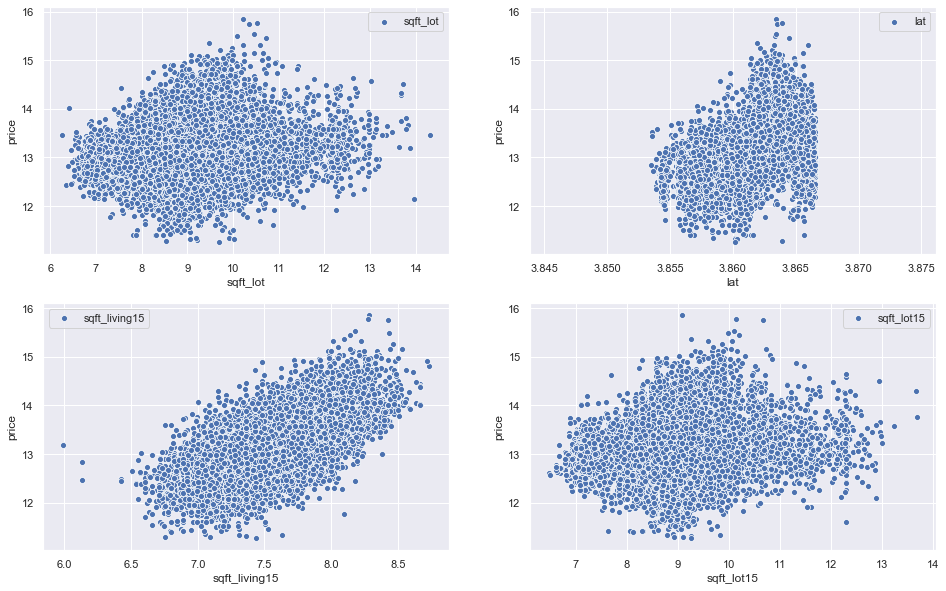

In [81]:
sns.set(context='notebook', style='darkgrid')
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
for col, axe in zip(df_test.columns[1:], axes.flatten()):
    sns.scatterplot(x=df_test[col], y=df_test.price, ax=axe, label=col)
    axe.legend()

From above, we can see that 'sqft_living15' and 'lat' appears to have a positive trend; however, the other features do not appear to have a positive or negative correlation.

We will check their R-squared values just to be sure:

In [82]:
# import libraries
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# build the formula 
f = 'price~sqft_lot'
# create a fitted model in one line
model = ols(formula=f, data=df_test).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     421.6
Date:                Sat, 20 Jun 2020   Prob (F-statistic):           8.55e-93
Time:                        20:40:39   Log-Likelihood:                -16275.
No. Observations:               21357   AIC:                         3.255e+04
Df Residuals:                   21355   BIC:                         3.257e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3277      0.035    347.682      0.000      12.258      12.397
sqft_lot       0.0806      0.004     20.533      0.000       0.073       0.088
==============================================================================
Omnibus:                      646.139   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              784.080
Skew:                           0.376   Prob(JB):                    5.48e-171
Kurtosis:                       3.563   Cond. No.                         91.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
# build the formula 
f = 'price~lat'
# create a fitted model in one line
model = ols(formula=f, data=df_test).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     5415.
Date:                Sat, 20 Jun 2020   Prob (F-statistic):               0.00
Time:                        20:40:39   Log-Likelihood:                -14070.
No. Observations:               21357   AIC:                         2.814e+04
Df Residuals:                   21355   BIC:                         2.816e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -298.8682      4.239    -70.509      0.000    -307.176    -290.560
lat           80.7666      1.098     73.589      0.000      78.615      82.918
==============================================================================
Omnibus:                     1733.268   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2807.947
Skew:                           0.618   Prob(JB):                         0.00
Kurtosis:                       4.276   Cond. No.                     5.46e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [84]:
# build the formula 
f = 'price~sqft_living15'
# create a fitted model in one line
model = ols(formula=f, data=df_test).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                 1.239e+04
Date:                Sat, 20 Jun 2020   Prob (F-statistic):               0.00
Time:                        20:40:39   Log-Likelihood:                -11599.
No. Observations:               21357   AIC:                         2.320e+04
Df Residuals:                   21355   BIC:                         2.322e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.7469      0.066     87.472      0.000       5.618       5.876
sqft_living15     0.9688      0.009    111.297      0.000       0.952       0.986
==============================================================================
Omnibus:                      430.943   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              500.897
Skew:                           0.302   Prob(JB):                    1.70e-109
Kurtosis:                       3.446   Cond. No.                         177.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
# build the formula 
f = 'price~sqft_lot15'
# create a fitted model in one line
model = ols(formula=f, data=df_test).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     336.6
Date:                Sat, 20 Jun 2020   Prob (F-statistic):           1.29e-74
Time:                        20:40:39   Log-Likelihood:                -16317.
No. Observations:               21357   AIC:                         3.264e+04
Df Residuals:                   21355   BIC:                         3.265e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3342      0.039    313.925      0.000      12.257      12.411
sqft_lot15     0.0801      0.004     18.348      0.000       0.072       0.089
==============================================================================
Omnibus:                      673.468   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              823.167
Skew:                           0.383   Prob(JB):                    1.78e-179
Kurtosis:                       3.581   Cond. No.                         101.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Just as we suspected, 'sqft_living15' has a slight positive correlation with 'price'.
Next, we will check heteroscedasticity and QQ normality:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


R-Squared: 0.01936099617982545
Intercept    12.327738
sqft_lot      0.080583
dtype: float64


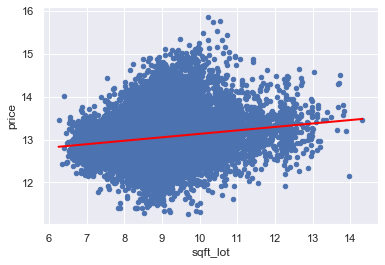

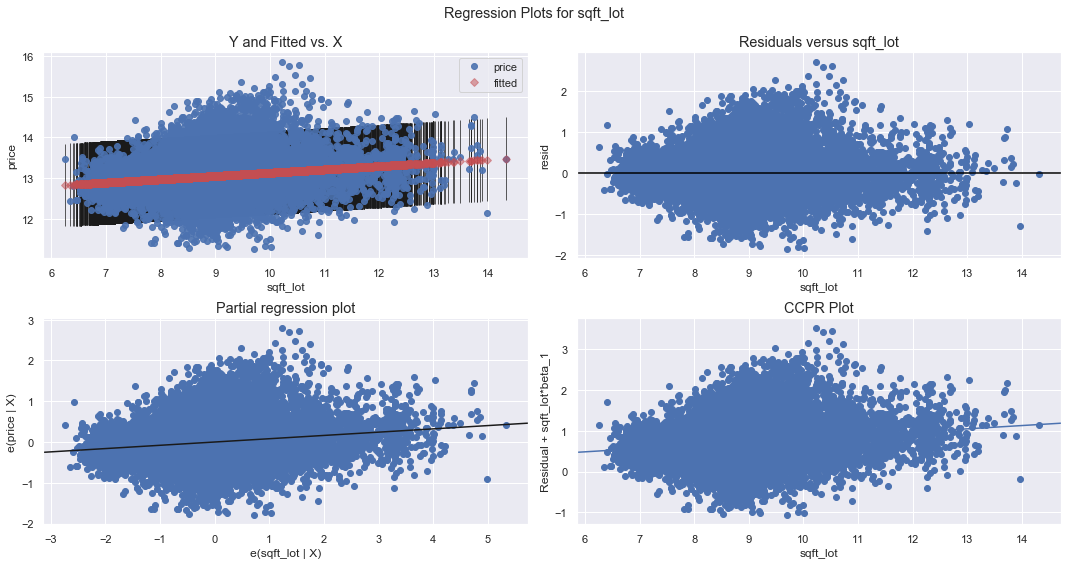

C:\Users\johnh\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


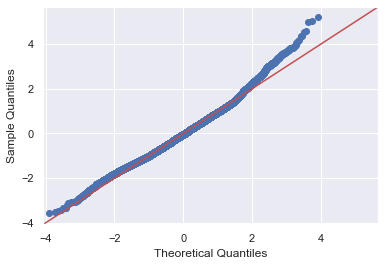

In [86]:
# code for model, prediction line plot, heteroscedasticity check and QQ normality check here
f = 'price~sqft_lot'
data = df_test
model = smf.ols(formula=f, data=data).fit()
print ('R-Squared:',model.rsquared)
print (model.params)
X_new = pd.DataFrame({'sqft_lot': [data.sqft_lot.min(), data.sqft_lot.max()]});
preds = model.predict(X_new)
data.plot(kind='scatter', x='sqft_lot', y='price');
plt.plot(X_new, preds, c='red', linewidth=2);
plt.show()
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_lot", fig=fig)
plt.show()

residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


R-Squared: 0.2022879019624234
Intercept   -298.868160
lat           80.766647
dtype: float64


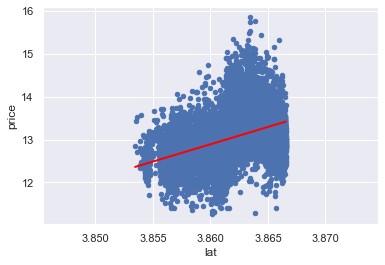

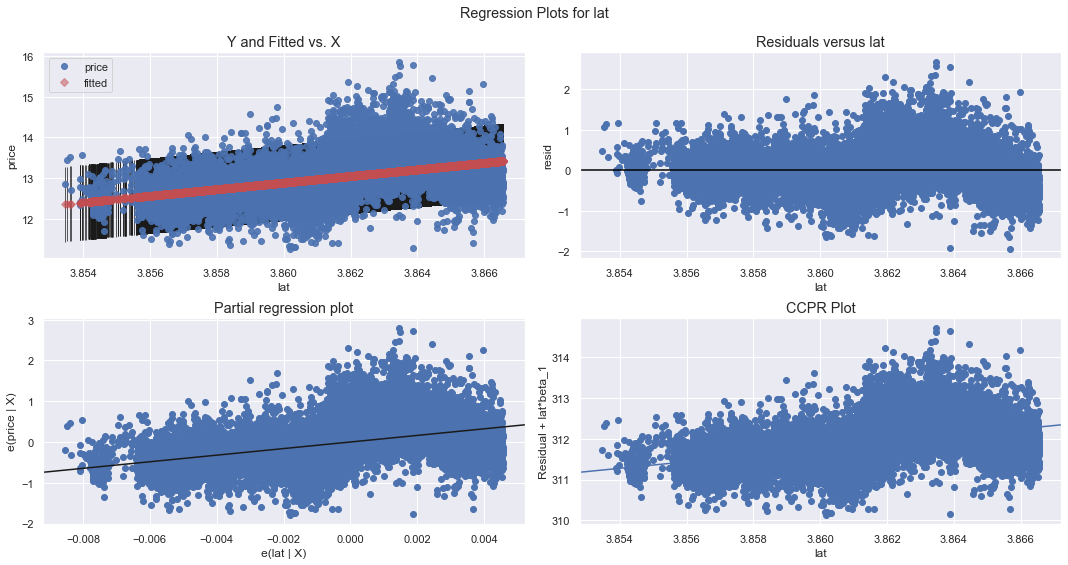

C:\Users\johnh\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


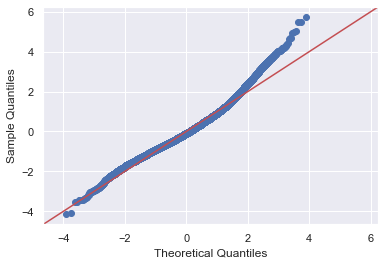

In [87]:
# code for model, prediction line plot, heteroscedasticity check and QQ normality check here
f = 'price~lat'
data = df_test
model = smf.ols(formula=f, data=data).fit()
print ('R-Squared:',model.rsquared)
print (model.params)
X_new = pd.DataFrame({'lat': [data.lat.min(), data.lat.max()]});
preds = model.predict(X_new)
data.plot(kind='scatter', x='lat', y='price');
plt.plot(X_new, preds, c='red', linewidth=2);
plt.show()
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "lat", fig=fig)
plt.show()

residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


R-Squared: 0.36711031941459216
Intercept        5.746854
sqft_living15    0.968838
dtype: float64


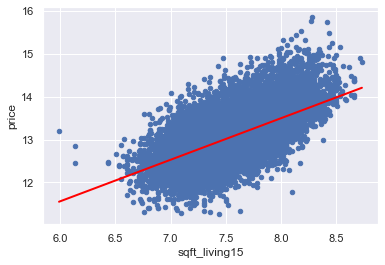

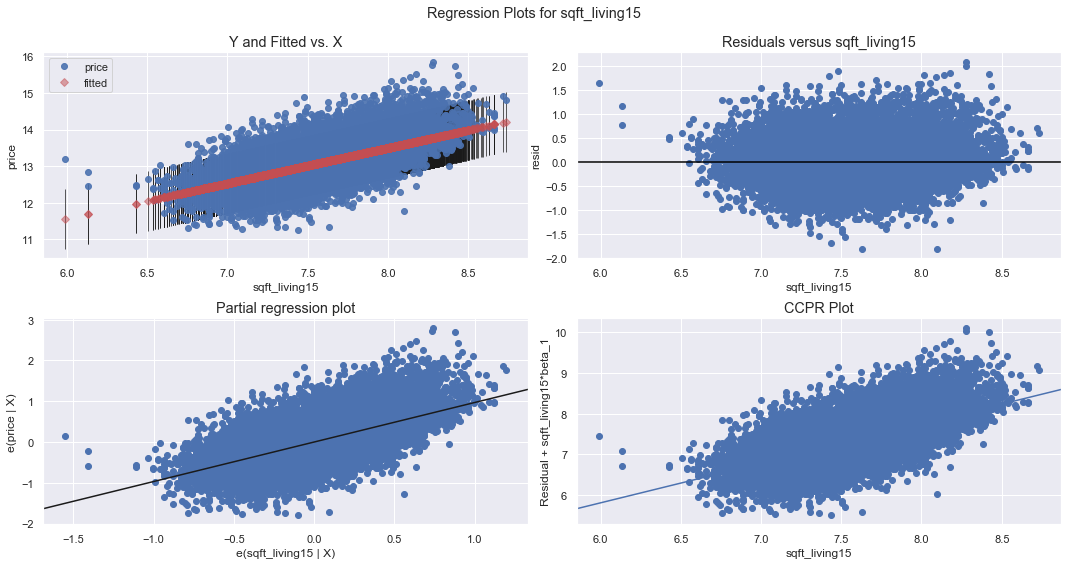

C:\Users\johnh\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


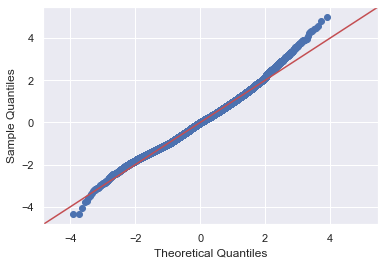

In [88]:
# code for model, prediction line plot, heteroscedasticity check and QQ normality check here
f = 'price~sqft_living15'
data = df_test
model = smf.ols(formula=f, data=data).fit()
print ('R-Squared:',model.rsquared)
print (model.params)
X_new = pd.DataFrame({'sqft_living15': [data.sqft_living15.min(), data.sqft_living15.max()]});
preds = model.predict(X_new)
data.plot(kind='scatter', x='sqft_living15', y='price');
plt.plot(X_new, preds, c='red', linewidth=2);
plt.show()
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living15", fig=fig)
plt.show()

residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


R-Squared: 0.015519222403288402
Intercept     12.334205
sqft_lot15     0.080123
dtype: float64


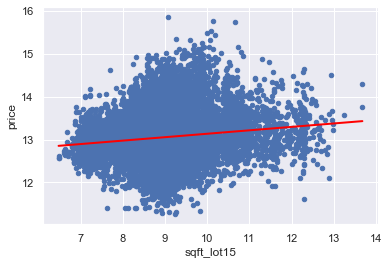

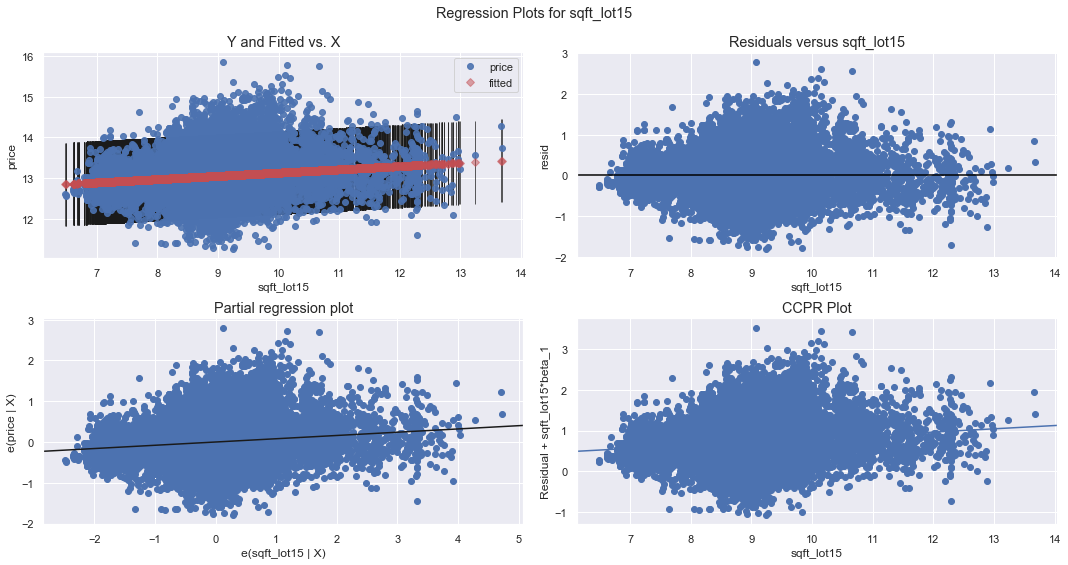

C:\Users\johnh\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


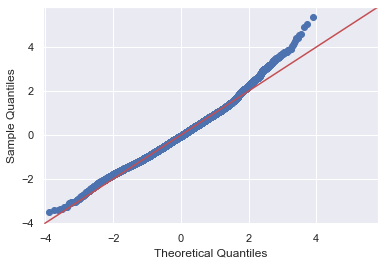

In [89]:
# code for model, prediction line plot, heteroscedasticity check and QQ normality check here
f = 'price~sqft_lot15'
data = df_test
model = smf.ols(formula=f, data=data).fit()
print ('R-Squared:',model.rsquared)
print (model.params)
X_new = pd.DataFrame({'sqft_lot15': [data.sqft_lot15.min(), data.sqft_lot15.max()]});
preds = model.predict(X_new)
data.plot(kind='scatter', x='sqft_lot15', y='price');
plt.plot(X_new, preds, c='red', linewidth=2);
plt.show()
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_lot15", fig=fig)
plt.show()

residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

Finally, let us take a look at the distributions again.

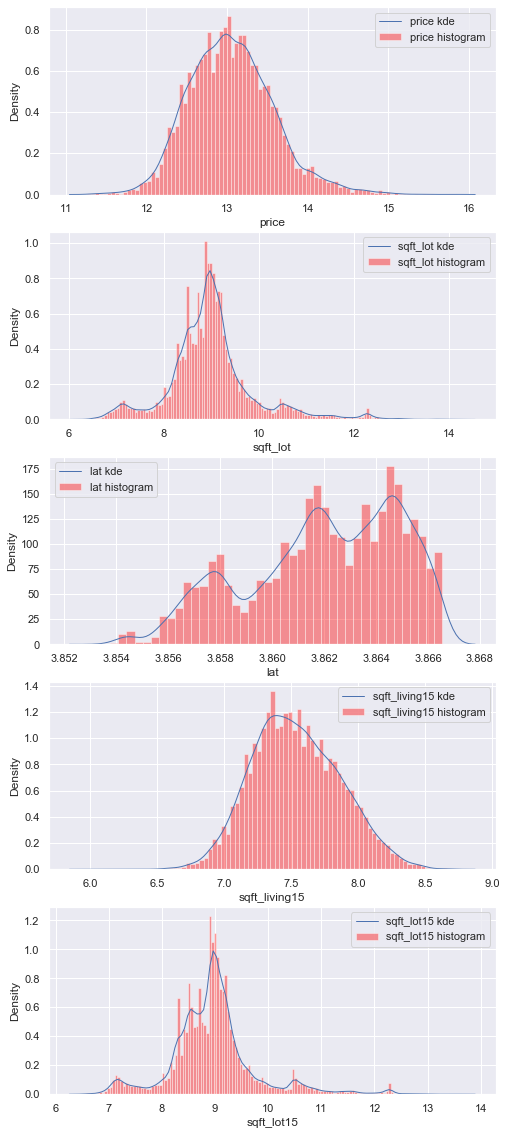

In [90]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8,20))
sns.set_style('darkgrid')
for i, col in enumerate(df_test.columns):
    sns.distplot(df_test[col], bins='auto', color='red', ax=axes[i], label=col+' histogram', kde=True, kde_kws={"color": "b", "lw": 1, "label":col+" kde"})
    axes[i].set_ylabel('Density')
    axes[i].legend()

plt.show()

From the above graphs, we determine that 'sqft_living15' is the only continuous variable that achieves all assumptions for use in linear regression: linearity, normality, and homoscedasticity

'lat' does show linearity, but lacks normality and homoscedasticity.

## Predictive Modeling
We move onto '06' which calls us to train a machine learning model, evalute its perforamnce, and use it to make predictions. We will use a multiple linear regression model for each of our dummy sets: x1, x2, x3

In [91]:
# below we drop all the data we are using as determined above
x1 = preprocessed1.drop(['id', 'price', 'date', 'sqft_lot', 'sqft_lot15'], axis=1)
x1

sqft_living15  bedrooms_2  bedrooms_3  bedrooms_4  bedrooms_5  \
16580       0.434406           0           0           1           0   
13040      -2.186340           1           0           0           0   
5632       -0.020009           0           0           0           1   
15797      -0.036385           0           0           0           1   
927        -0.970222           1           0           0           0   
...              ...         ...         ...         ...         ...   
7316       -1.225847           0           0           1           0   
19661       1.733122           0           0           0           1   
6418       -0.904066           0           1           0           0   
10689       1.277625           0           0           1           0   
4959        0.951094           0           1           0           0   

       bedrooms_6  bedrooms_7  bedrooms_8  bedrooms_9  bedrooms_10  ...  \
16580           0           0           0           0            0  ...   
13040           0           0           0           0            0  ...   
5632            0           0           0           0            0  ...   
15797           0           0           0           0            0  ...   
927             0           0           0           0            0  ...   
...           ...         ...         ...         ...          ...  ...   
7316            0           0           0           0            0  ...   
19661           0           0           0           0            0  ...   
6418            0           0           0           0            0  ...   
10689           0           0           0           0            0  ...   
4959            0           0           0           0            0  ...   

       long_-121.40299999999999  long_-121.402  long_-121.36399999999999  \
16580                         0              0                         0   
13040                         0              0                         0   
5632                          0              0                         0   
15797                         0              0                         0   
927                           0              0                         0   
...                         ...            ...                       ...   
7316                          0              0                         0   
19661                         0              0                         0   
6418                          0              0                         0   
10689                         0              0                         0   
4959                          0              0                         0   

       long_-121.359  long_-121.352  long_-121.325  long_-121.321  \
16580              0              0              0              0   
13040              0              0              0              0   
5632               0              0              0              0   
15797              0              0              0              0   
927                0              0              0              0   
...              ...            ...            ...            ...   
7316               0              0              0              0   
19661              0              0              0              0   
6418               0              0              0              0   
10689              0              0              0              0   
4959               0              0              0              0   

       long_-121.319  long_-121.316  long_-121.315  
16580              0              0              0  
13040              0              0              0  
5632               0              0              0  
15797              0              0              0  
927                0              0              0  
...              ...            ...            ...  
7316               0              0              0  
19661              0              0              0  
6418               0  

In [92]:
x2 = preprocessed2.drop(['id', 'price', 'date', 'sqft_lot', 'sqft_lot15'], axis=1)
x3 = preprocessed3.drop(['id', 'price', 'date', 'sqft_lot', 'sqft_lot15'], axis=1)
y = preprocessed1['price']

In [93]:
x = x1
x_int = sm.add_constant(x)
model = sm.OLS(y, x_int).fit() # calculate multiple linear regression model for dummy set 1
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     136.2
Date:                Sat, 20 Jun 2020   Prob (F-statistic):               0.00
Time:                        20:40:51   Log-Likelihood:                -8548.5
No. Observations:               21357   AIC:                         1.909e+04
Df Residuals:                   20359   BIC:                         2.705e+04
Df Model:                         997                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -1.1972      0.642     -1.864      0.062      -2.456       0.062
sqft_living15                0.1773      0.004     39.622      0.000       0.169       0.186
bedrooms_2                   0.1115      0.030      3.752      0.000       0.053       0.170
bedrooms_3                   0.2137      0.030      7.167      0.000       0.155       0.272
bedrooms_4                   0.2978      0.030      9.819      0.000       0.238       0.357
bedrooms_5                   0.3140      0.032      9.887      0.000       0.252       0.376
bedrooms_6                   0.3481      0.039      9.010      0.000       0.272       0.424
bedrooms_7                   0.1720      0.070      2.467      0.014       0.035       0.309
bedrooms_8                   0.3906      0.110      3.536      0.000       0.174       0.607
bedrooms_9                   0.3022      0.173      1.744      0.081      -0.037       0.642
bedrooms_10                  0.1525      0.222      0.687      0.492      -0.283       0.588
bedrooms_11                  0.8032      0.375      2.140      0.032       0.068       1.539
bedrooms_33                  0.3141      0.375      0.838      0.402      -0.421       1.049
bathrooms_0.75               0.4025      0.194      2.074      0.038       0.022       0.783
bathrooms_1.0                0.4133      0.188      2.202      0.028       0.045       0.781
bathrooms_1.25               0.4707      0.226      2.086      0.037       0.029       0.913
bathrooms_1.5                0.5054      0.188      2.688      0.007       0.137       0.874
bathrooms_1.75               0.5914      0.188      3.148      0.002       0.223       0.960
bathrooms_2.0                0.5979      0.188      3.182      0.001       0.230       0.966
bathrooms_2.25               0.6821      0.188      3.629      0.000       0.314       1.051
bathrooms_2.5                0.7213      0.188      3.838      0.000       0.353       1.090
bathrooms_2.75               0.7613      0.188      4.046      0.000       0.392       1.130
bathrooms_3.0                0.8105      0.188      4.303      0.000       0.441       1.180
bathrooms_3.25               0.8738      0.189      4.633      0.000       0.504       1.243
bathrooms_3.5                0.8872      0.189      4.706      0.000       0.518       1.257
bathrooms_3.75               1.0079      0.191      5.290      0.000       0.634       1.381
bathrooms_4.0                0.9975      0.191      5.223      0.000       0.623       1.372
bathrooms_4.25               1.1142      0.193      5.768      0.000       0.736       1.493
bathrooms_4.5                1.0792      0.192      5.619      0.000       0.703       1.456
bathrooms_4.75               1.2881      0.204      6.302      0.000       0.887       1.689
bathrooms_5.0 

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42) #split data into train and test sets

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)


train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse) #the average squared difference between the estimated train values and the actual train values
print('Test Mean Squarred Error:', test_mse) #the average squared difference between the estimated test values and the actual test values

Train Mean Squarred Error: 0.13006857855752324
Test Mean Squarred Error: 3.0895636049888156e+20


In [96]:
linreg.coef_

array([ 1.78290544e-01,  1.10402540e-01,  2.11210162e-01,  2.97813285e-01,
        3.02530294e-01,  3.53527938e-01,  1.49819622e-01,  4.05743119e-01,
        2.88578821e-01,  1.62303175e-01,  3.43521944e+10,  3.05604986e-01,
        1.77793951e-01,  2.46785995e-01,  3.21052756e-01,  3.45399413e-01,
        4.23923153e-01,  4.27654670e-01,  5.13878504e-01,  5.50913888e-01,
        5.93343951e-01,  6.41649888e-01,  7.13527870e-01,  7.29884295e-01,
        8.24099225e-01,  8.31208164e-01,  9.38466573e-01,  9.35514150e-01,
        1.07355949e+00,  1.03470424e+00,  1.01566863e+00,  1.26319894e+00,
        8.71893282e-01,  5.78542677e-01,  2.59680906e+00,  1.50260733e+00,
        9.75355365e-01,  7.21190808e-01, -6.05202103e+11,  1.28279049e+00,
        5.95968647e-02,  1.22115010e-02,  9.14550706e-02, -1.68850268e-01,
       -9.51562781e-02,  2.16220679e-01,  2.17990114e-01,  3.99294190e-01,
        9.40928707e-01,  3.41131980e-01,  5.51485291e-01,  6.36673856e-01,
        7.32569430e-01, -

In [97]:
len(linreg.coef_) #number of coef

997

In [98]:
linreg.intercept_

-0.6852970893066166

We use from above that the 'Test Mean Squarred Error' is way too high, so we must do feature selection to figure out which features our model should include to predict more accurately and precisely.

Next is x2:

In [99]:
x = x2
x_int = sm.add_constant(x)
model = sm.OLS(y, x_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     936.2
Date:                Sat, 20 Jun 2020   Prob (F-statistic):               0.00
Time:                        20:40:52   Log-Likelihood:                -9729.5
No. Observations:               21357   AIC:                         1.973e+04
Df Residuals:                   21223   BIC:                         2.079e+04
Df Model:                         133                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.1452      0.438     -4.894      0.000      -3.005      -1.286
sqft_living15       0.2000      0.004     45.919      0.000       0.191       0.208
bedrooms_2          0.1096      0.030      3.673      0.000       0.051       0.168
bedrooms_3          0.1934      0.030      6.473      0.000       0.135       0.252
bedrooms_4          0.2852      0.030      9.392      0.000       0.226       0.345
bedrooms_5          0.3016      0.032      9.492      0.000       0.239       0.364
bedrooms_6          0.3287      0.039      8.476      0.000       0.253       0.405
bedrooms_7          0.1439      0.071      2.031      0.042       0.005       0.283
bedrooms_8          0.3469      0.112      3.084      0.002       0.126       0.567
bedrooms_9          0.2956      0.176      1.679      0.093      -0.050       0.641
bedrooms_10         0.0771      0.227      0.340      0.734      -0.367       0.521
bedrooms_11         0.9695      0.385      2.519      0.012       0.215       1.724
bedrooms_33         0.4461      0.384      1.160      0.246      -0.307       1.200
bathrooms_0.75      0.4250      0.198      2.149      0.032       0.037       0.813
bathrooms_1.0       0.4366      0.192      2.275      0.023       0.060       0.813
bathrooms_1.25      0.4034      0.231      1.749      0.080      -0.049       0.855
bathrooms_1.5       0.4932      0.192      2.566      0.010       0.116       0.870
bathrooms_1.75      0.5814      0.192      3.027      0.002       0.205       0.958
bathrooms_2.0       0.5891      0.192      3.066      0.002       0.212       0.966
bathrooms_2.25      0.6374      0.192      3.317      0.001       0.261       1.014
bathrooms_2.5       0.6771      0.192      3.525      0.000       0.301       1.054
bathrooms_2.75      0.7290      0.192      3.790      0.000       0.352       1.106
bathrooms_3.0       0.7719      0.193      4.009      0.000       0.394       1.149
bathrooms_3.25      0.8436      0.193      4.375      0.000       0.466       1.221
bathrooms_3.5       0.8486      0.193      4.404      0.000       0.471       1.226
bathrooms_3.75      0.9796      0.195      5.032      0.000       0.598       1.361
bathrooms_4.0       0.9884      0.195      5.064      0.000       0.606       1.371
bathrooms_4.25      1.0978      0.197      5.563      0.000       0.711       1.485
bathrooms_4.5       1.0537      0.196      5.368      0.000       0.669       1.438
bathrooms_4.75      1.3071      0.209      6.262      0.000       0.898       1.716
bathrooms_5.0       1.1332      0.210      5.391      0.000       0.721       1.545
bathrooms_5.25      1.1528      0.221      5.217      0.000       0.720       1.586
bathrooms_5.5       1.5107      0.229      6.589      0.000       1.061       1.960
bathrooms_5.75      1.1441      0.275      4.158      0.000

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)


train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.14802959878849917
Test Mean Squarred Error: 7.464561850287422e+22


In [102]:
linreg.coef_

array([ 1.98720984e-01,  7.15077167e-02,  1.52581364e-01,  2.47944726e-01,
        2.56007990e-01,  2.60048092e-01,  6.94361830e-02,  3.29471337e-01,
        4.12287335e-01,  1.69324361e-01, -1.76755867e+13,  4.06536298e-01,
        1.34330594e-01,  1.79445738e-01,  1.13547406e-01,  2.47201221e-01,
        3.25132827e-01,  3.32106677e-01,  3.79446061e-01,  4.14750253e-01,
        4.65658541e-01,  5.08720775e-01,  5.79890666e-01,  5.92410761e-01,
        6.96388811e-01,  6.89999144e-01,  8.13356711e-01,  8.61457158e-01,
        7.98649125e-01,  1.27395745e+00,  7.16422295e-01,  1.36333521e+00,
        4.70401311e-01,  3.16498697e-01,  3.13645538e+00,  1.76232824e+00,
        1.06141204e+00, -2.14246917e-01, -2.54159754e+12,  1.12952184e+00,
        1.28035218e-01,  8.64968742e-03,  9.67563319e-02, -2.64249006e-01,
       -3.03656710e-01,  1.91971829e-01,  2.42983119e-01,  4.35506780e-01,
        9.52921826e-01,  3.48626099e-01,  5.75254754e-01,  6.78608191e-01,
        8.10084374e-01, -

In [103]:
len(linreg.coef_)

133

In [104]:
linreg.intercept_

-2.55675251200885

The same case holds for x2 as it did for x1. The 'Test Mean Squarred Error' is way too high, so we must do feature selection to figure out which features our model should include to predict more accurately and precisely.

Next is x3:

In [105]:
x = x3
x_int = sm.add_constant(x)
model = sm.OLS(y, x_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     522.9
Date:                Sat, 20 Jun 2020   Prob (F-statistic):               0.00
Time:                        20:40:53   Log-Likelihood:                -9308.4
No. Observations:               21357   AIC:                         1.911e+04
Df Residuals:                   21108   BIC:                         2.110e+04
Df Model:                         248                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.0813      0.435     -4.788      0.000      -2.933      -1.229
sqft_living15       0.1873      0.004     42.964      0.000       0.179       0.196
bedrooms_2          0.1052      0.030      3.560      0.000       0.047       0.163
bedrooms_3          0.2016      0.030      6.804      0.000       0.144       0.260
bedrooms_4          0.2807      0.030      9.316      0.000       0.222       0.340
bedrooms_5          0.2945      0.032      9.331      0.000       0.233       0.356
bedrooms_6          0.3208      0.039      8.319      0.000       0.245       0.396
bedrooms_7          0.1564      0.070      2.231      0.026       0.019       0.294
bedrooms_8          0.3695      0.111      3.322      0.001       0.151       0.588
bedrooms_9          0.2259      0.175      1.291      0.197      -0.117       0.569
bedrooms_10         0.0377      0.224      0.169      0.866      -0.401       0.476
bedrooms_11         0.8217      0.380      2.162      0.031       0.077       1.566
bedrooms_33         0.4478      0.379      1.182      0.237      -0.295       1.190
bathrooms_0.75      0.4376      0.195      2.243      0.025       0.055       0.820
bathrooms_1.0       0.4511      0.189      2.382      0.017       0.080       0.822
bathrooms_1.25      0.5177      0.228      2.275      0.023       0.072       0.964
bathrooms_1.5       0.5417      0.190      2.857      0.004       0.170       0.913
bathrooms_1.75      0.6305      0.190      3.327      0.001       0.259       1.002
bathrooms_2.0       0.6381      0.190      3.366      0.001       0.267       1.010
bathrooms_2.25      0.7195      0.190      3.794      0.000       0.348       1.091
bathrooms_2.5       0.7592      0.190      4.005      0.000       0.388       1.131
bathrooms_2.75      0.7984      0.190      4.206      0.000       0.426       1.170
bathrooms_3.0       0.8523      0.190      4.485      0.000       0.480       1.225
bathrooms_3.25      0.9232      0.190      4.852      0.000       0.550       1.296
bathrooms_3.5       0.9311      0.190      4.897      0.000       0.558       1.304
bathrooms_3.75      1.0530      0.192      5.481      0.000       0.676       1.430
bathrooms_4.0       1.0466      0.193      5.434      0.000       0.669       1.424
bathrooms_4.25      1.1680      0.195      5.997      0.000       0.786       1.550
bathrooms_4.5       1.1315      0.194      5.842      0.000       0.752       1.511
bathrooms_4.75      1.3641      0.206      6.624      0.000       0.960       1.768
bathrooms_5.0       1.2188      0.207      5.877      0.000       0.812       1.625
bathrooms_5.25      1.2681      0.218      5.817      0.000       0.841       1.695
bathrooms_5.5       1.5788      0.226      6.978      0.000       1.135       2.022
bathrooms_5.75      1.1488      0.271      4.234      0.000

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)


train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.14069111185942343
Test Mean Squarred Error: 3.622605234567048e+20


In [108]:
linreg.coef_

array([ 1.86923007e-01,  1.05686426e-01,  1.98425585e-01,  2.81078821e-01,
        2.84269457e-01,  3.31576463e-01,  1.33284720e-01,  4.03690245e-01,
        2.32067686e-01,  4.35179600e-02, -1.24398786e+12,  4.54036901e-01,
        2.78218251e-01,  3.18208343e-01,  4.12500223e-01,  4.16552150e-01,
        4.96001246e-01,  4.99094628e-01,  5.81934541e-01,  6.19538766e-01,
        6.62511117e-01,  7.11174108e-01,  7.95307061e-01,  8.05164327e-01,
        9.01087087e-01,  9.18352526e-01,  1.02354007e+00,  1.01696245e+00,
        1.18027459e+00,  1.12644592e+00,  1.09740431e+00,  1.36923515e+00,
        9.62169492e-01,  5.85753976e-01,  2.64200784e+00,  1.57294875e+00,
        1.03635057e+00,  7.40813834e-01, -8.43527381e+09,  1.33982817e+00,
        5.87229964e-02,  9.40539504e-03,  8.63003406e-02, -1.76733163e-01,
       -8.06569529e-02,  2.29673574e-01,  2.26332434e-01,  4.00350647e-01,
        9.41174484e-01,  3.19377586e-01,  5.45228365e-01,  6.29930668e-01,
        7.30745744e-01, -

In [109]:
len(linreg.coef_)

248

In [110]:
linreg.intercept_

-1.9591827971154159

Again, the 'Test Mean Squarred Error' is way too high, so we must do feature selection to figure out which features our model should include to predict more accurately and precisely.
### Feature Ranking with Recursive Feature Elimination
Use feature ranking to select the most important features for better model representation; this ensures only features with a p-value >0.05 are selected

In [111]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#The below results were obtained through varying 'n_features_to_select'
#x1:
#90 ~75.57 with dummy set 1 (x1)
#going above 90 results in Test Mean Squarred Error being very large

#x2:
#80 ~ 78.03 with dummy set 2 (x2)

#x3:
#103 ~83.45 wih dummy set 3 (x3)

In [112]:
x = x1
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=90)
selector = selector.fit(x, y.values.ravel()) # y converted to 1d np array to prevent dataconversion warning
selector.support_

array([False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True,  True, False, False, False, False,  True,
       False, False, False, False,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

Fit the linear regression model again using the selected columns

In [113]:
selected_columns = x.columns[selector.support_ ]
linreg.fit(x[selected_columns],y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [114]:
x.columns[selector.support_]

Index(['bedrooms_11', 'bathrooms_3.75', 'bathrooms_4.0', 'bathrooms_4.25',
       'bathrooms_4.5', 'bathrooms_4.75', 'bathrooms_5.0', 'bathrooms_5.25',
       'bathrooms_5.5', 'bathrooms_5.75', 'bathrooms_6.0', 'bathrooms_6.25',
       'bathrooms_6.5', 'bathrooms_8.0', 'view_3.0', 'view_4.0', 'grade_4',
       'grade_9', 'grade_10', 'grade_11', 'grade_12', 'grade_13',
       'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007',
       'zipcode_98008', 'zipcode_98011', 'zipcode_98024', 'zipcode_98027',
       'zipcode_98028', 'zipcode_98029', 'zipcode_98033', 'zipcode_98034',
       'zipcode_98039', 'zipcode_98040', 'zipcode_98052', 'zipcode_98053',
       'zipcode_98059', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074',
       'zipcode_98075', 'zipcode_98077', 'zipcode_98102', 'zipcode_98103',
       'zipcode_98105', 'zipcode_98107', 'zipcode_98109', 'zipcode_98112',
       'zipcode_98115', 'zipcode_98116', 'zipcode_98117', 'zipcode_98118',
       'zipcode_98119', 'zipc

Now, predict $\hat y$ using our model with .predict() in scikit-learn.

In [115]:
X_train, X_test, y_train, y_test = train_test_split(x[selected_columns], y, test_size=0.20, random_state=42)

In [116]:
linreg = LinearRegression()
reg = linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [117]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.2910347626058346
Test Mean Squarred Error: 0.28797907795647215


In [118]:
reg.score(X_test, y_test ) #how well correlated the x_test values are with y_test results, best is 1 or -1 and worse is 0.

0.7137770224366051

In [119]:
#The below is the model without splitting data for training
x_int = sm.add_constant(x[selected_columns])
model = sm.OLS(y, x_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     579.5
Date:                Sat, 20 Jun 2020   Prob (F-statistic):               0.00
Time:                        20:46:59   Log-Likelihood:                -17072.
No. Observations:               21357   AIC:                         3.433e+04
Df Residuals:                   21266   BIC:                         3.505e+04
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.8718      0.006   -139.147      0.000      -0.884      -0.860
bedrooms_11                  1.0809      0.539      2.004      0.045       0.024       2.138
bathrooms_3.75               0.4016      0.044      9.066      0.000       0.315       0.488
bathrooms_4.0                0.3943      0.048      8.242      0.000       0.301       0.488
bathrooms_4.25               0.4564      0.063      7.252      0.000       0.333       0.580
bathrooms_4.5                0.4251      0.055      7.678      0.000       0.317       0.534
bathrooms_4.75               0.7364      0.114      6.453      0.000       0.513       0.960
bathrooms_5.0                0.4132      0.119      3.470      0.001       0.180       0.647
bathrooms_5.25               0.4570      0.151      3.020      0.003       0.160       0.754
bathrooms_5.5                0.9131      0.175      5.211      0.000       0.570       1.257
bathrooms_5.75               0.4439      0.276      1.611      0.107      -0.096       0.984
bathrooms_6.0                0.5543      0.247      2.247      0.025       0.071       1.038
bathrooms_6.25               0.9122      0.391      2.334      0.020       0.146       1.678
bathrooms_6.5                0.6059      0.383      1.580      0.114      -0.146       1.357
bathrooms_8.0                0.8198      0.393      2.087      0.037       0.050       1.590
view_3.0                     0.5937      0.025     23.809      0.000       0.545       0.643
view_4.0                     1.1369      0.032     35.802      0.000       1.075       1.199
grade_4                     -1.0799      0.104    -10.386      0.000      -1.284      -0.876
grade_9                      0.8118      0.012     68.310      0.000       0.789       0.835
grade_10                     1.1386      0.018     63.290      0.000       1.103       1.174
grade_11                     1.5104      0.030     50.370      0.000       1.452       1.569
grade_12                     1.8872      0.062     30.241      0.000       1.765       2.010
grade_13                     2.4040      0.162     14.797      0.000       2.086       2.723
zipcode_98004                2.0414      0.031     64.882      0.000       1.980       2.103
zipcode_98005                1.3798      0.042     32.684      0.000       1.297       1.463
zipcode_98006                1.1516      0.026     44.925      0.000       1.101       1.202
zipcode_98007                1.0603      0.046     22.949      0.000       0.970       1.151
zipcode_98008                1.0828      0.033     33.138      0.000       1.019       1.147
zipcode_98011                0.7124      0.039     18.115      0.000       0.635       0.789
zipcode_98024                0.7092      0.061     11.537      0.000       0.589       0.830
zipcode_98027 

In [120]:
yhat = linreg.predict(x[selected_columns])

In [121]:
SS_Residual = np.sum((y-yhat)**2)
SS_Total = np.sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-x[selected_columns].shape[1]-1)
print(r_squared, adjusted_r_squared)

0.7095628610156053 0.7083336997954137


In [122]:
x = x2
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=80)
selector = selector.fit(x, y.values.ravel()) # y converted to 1d np array to prevent dataconversion warning
selector.support_

array([False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True, False, False, False,  True, False,
        True,  True,  True,  True, False, False, False, False,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
       False, False, False,  True,  True, False,  True,  True, False,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True, False,

Fit the linear regression model again using the selected columns

In [123]:
selected_columns = x.columns[selector.support_ ]
linreg.fit(x[selected_columns],y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [124]:
x.columns[selector.support_]

Index(['bedrooms_11', 'bathrooms_3.25', 'bathrooms_3.5', 'bathrooms_3.75',
       'bathrooms_4.0', 'bathrooms_4.25', 'bathrooms_4.5', 'bathrooms_4.75',
       'bathrooms_5.0', 'bathrooms_5.25', 'bathrooms_5.5', 'bathrooms_5.75',
       'bathrooms_6.0', 'bathrooms_6.25', 'bathrooms_6.5', 'bathrooms_6.75',
       'bathrooms_8.0', 'floors_3.0', 'view_1.0', 'view_2.0', 'view_3.0',
       'view_4.0', 'grade_4', 'grade_5', 'grade_6', 'grade_9', 'grade_10',
       'grade_11', 'grade_12', 'grade_13', 'zipcode_98004', 'zipcode_98005',
       'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010',
       'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98024',
       'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98033',
       'zipcode_98034', 'zipcode_98039', 'zipcode_98040', 'zipcode_98045',
       'zipcode_98052', 'zipcode_98053', 'zipcode_98056', 'zipcode_98059',
       'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074',
       'zipcode_98

Now, predict $\hat y$ using our model with .predict() in scikit-learn.

In [125]:
X_train, X_test, y_train, y_test = train_test_split(x[selected_columns], y, test_size=0.20, random_state=42)

In [126]:
linreg = LinearRegression()
reg = linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [127]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.22461095078997464
Test Mean Squarred Error: 0.22103799252474668


In [128]:
reg.score(X_test, y_test )

0.780309900205212

In [129]:
#The below is the model without splitting data for training
x_int = sm.add_constant(x[selected_columns])
model = sm.OLS(y, x_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     924.5
Date:                Sat, 20 Jun 2020   Prob (F-statistic):               0.00
Time:                        20:47:03   Log-Likelihood:                -14299.
No. Observations:               21357   AIC:                         2.876e+04
Df Residuals:                   21276   BIC:                         2.940e+04
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.9100      0.006   -140.320      0.000      -0.923      -0.897
bedrooms_11        1.1191      0.474      2.363      0.018       0.191       2.047
bathrooms_3.25     0.3084      0.021     14.868      0.000       0.268       0.349
bathrooms_3.5      0.2952      0.019     15.624      0.000       0.258       0.332
bathrooms_3.75     0.4472      0.039     11.441      0.000       0.371       0.524
bathrooms_4.0      0.4643      0.042     10.990      0.000       0.381       0.547
bathrooms_4.25     0.5328      0.056      9.598      0.000       0.424       0.642
bathrooms_4.5      0.5028      0.049     10.297      0.000       0.407       0.599
bathrooms_4.75     0.7921      0.100      7.891      0.000       0.595       0.989
bathrooms_5.0      0.5540      0.105      5.292      0.000       0.349       0.759
bathrooms_5.25     0.4935      0.133      3.711      0.000       0.233       0.754
bathrooms_5.5      0.8984      0.154      5.830      0.000       0.596       1.200
bathrooms_5.75     0.4636      0.242      1.915      0.055      -0.011       0.938
bathrooms_6.0      0.6556      0.217      3.024      0.002       0.231       1.080
bathrooms_6.25     1.1307      0.343      3.294      0.001       0.458       1.803
bathrooms_6.5      0.8231      0.337      2.444      0.015       0.163       1.483
bathrooms_6.75     0.3130      0.337      0.929      0.353      -0.348       0.974
bathrooms_8.0      1.1417      0.345      3.309      0.001       0.465       1.818
floors_3.0        -0.3198      0.021    -15.445      0.000      -0.360      -0.279
view_1.0           0.4059      0.027     15.167      0.000       0.353       0.458
view_2.0           0.3966      0.016     24.655      0.000       0.365       0.428
view_3.0           0.5994      0.022     27.302      0.000       0.556       0.642
view_4.0           1.1729      0.028     42.037      0.000       1.118       1.228
grade_4           -1.1877      0.091    -12.986      0.000      -1.367      -1.008
grade_5           -0.9042      0.031    -28.738      0.000      -0.966      -0.843
grade_6           -0.5526      0.012    -47.662      0.000      -0.575      -0.530
grade_9            0.6704      0.011     62.566      0.000       0.649       0.691
grade_10           0.9572      0.016     58.308      0.000       0.925       0.989
grade_11           1.2555      0.027     46.094      0.000       1.202       1.309
grade_12           1.6328      0.055     29.468      0.000       1.524       1.741
grade_13           2.1947      0.143     15.371      0.000       1.915       2.475
zipcode_98004      2.0930      0.028     75.154      0.000       2.038       2.148
zipcode_98005      1.4487      0.037     38.915      0.000       1.376       1.522
zipcode_98006      1.1972      0.023     52.582      0.000       1.153       1.242
zipcode_9800

In [130]:
yhat = linreg.predict(x[selected_columns])

In [131]:
SS_Residual = np.sum((y-yhat)**2)
SS_Total = np.sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-x[selected_columns].shape[1]-1)
print(r_squared, adjusted_r_squared)

0.7760932572432837 0.7752513443169565


Finally, x3:

In [132]:
x = x3
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=103)
selector = selector.fit(x, y.values.ravel()) # y converted to 1d np array to prevent dataconversion warning
selector.support_

array([False, False, False, False, False, False, False, False, False,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

Fit the linear regression model again using the selected columns

In [133]:
selected_columns = x.columns[selector.support_ ]
linreg.fit(x[selected_columns],y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [134]:
x.columns[selector.support_]

Index(['bedrooms_11', 'bathrooms_0.75', 'bathrooms_1.0', 'bathrooms_1.25',
       'bathrooms_1.5', 'bathrooms_1.75', 'bathrooms_2.0', 'bathrooms_2.25',
       'bathrooms_2.5', 'bathrooms_2.75',
       ...
       'zipcode_98133', 'zipcode_98136', 'zipcode_98144', 'zipcode_98146',
       'zipcode_98148', 'zipcode_98155', 'zipcode_98166', 'zipcode_98177',
       'zipcode_98178', 'zipcode_98199'],
      dtype='object', length=103)

Now, predict $\hat y$ using our model with .predict() in scikit-learn.

In [135]:
X_train, X_test, y_train, y_test = train_test_split(x[selected_columns], y, test_size=0.20, random_state=42)

In [136]:
linreg = LinearRegression()
reg = linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [137]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.17088637389970884
Test Mean Squarred Error: 0.16653983429979327


In [138]:
reg.score(X_test, y_test)

0.8344757279089347

In [139]:
#The below is the model without splitting data for training
x_int = sm.add_constant(x[selected_columns])
model = sm.OLS(y, x_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     1011.
Date:                Sat, 20 Jun 2020   Prob (F-statistic):               0.00
Time:                        20:47:17   Log-Likelihood:                -11353.
No. Observations:               21357   AIC:                         2.291e+04
Df Residuals:                   21253   BIC:                         2.374e+04
Df Model:                         103                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.7306      0.209     -8.267      0.000      -2.141      -1.320
bedrooms_11        0.7014      0.414      1.696      0.090      -0.109       1.512
bathrooms_0.75     0.3226      0.213      1.514      0.130      -0.095       0.740
bathrooms_1.0      0.3909      0.207      1.891      0.059      -0.014       0.796
bathrooms_1.25     0.2750      0.249      1.106      0.269      -0.212       0.762
bathrooms_1.5      0.5000      0.207      2.415      0.016       0.094       0.906
bathrooms_1.75     0.6276      0.207      3.033      0.002       0.222       1.033
bathrooms_2.0      0.6409      0.207      3.097      0.002       0.235       1.047
bathrooms_2.25     0.7189      0.207      3.473      0.001       0.313       1.125
bathrooms_2.5      0.8001      0.207      3.867      0.000       0.395       1.206
bathrooms_2.75     0.8945      0.207      4.318      0.000       0.488       1.301
bathrooms_3.0      0.9294      0.207      4.482      0.000       0.523       1.336
bathrooms_3.25     0.9973      0.208      4.804      0.000       0.590       1.404
bathrooms_3.5      1.0092      0.207      4.865      0.000       0.603       1.416
bathrooms_3.75     1.1588      0.210      5.529      0.000       0.748       1.570
bathrooms_4.0      1.2011      0.210      5.717      0.000       0.789       1.613
bathrooms_4.25     1.2850      0.212      6.050      0.000       0.869       1.701
bathrooms_4.5      1.2504      0.211      5.922      0.000       0.837       1.664
bathrooms_4.75     1.5117      0.225      6.731      0.000       1.072       1.952
bathrooms_5.0      1.3249      0.226      5.861      0.000       0.882       1.768
bathrooms_5.25     1.2683      0.237      5.350      0.000       0.804       1.733
bathrooms_5.5      1.6196      0.247      6.564      0.000       1.136       2.103
bathrooms_5.75     1.1646      0.296      3.940      0.000       0.585       1.744
bathrooms_6.0      1.3773      0.280      4.916      0.000       0.828       1.926
bathrooms_6.25     1.9289      0.364      5.296      0.000       1.215       2.643
bathrooms_6.5      1.5692      0.359      4.370      0.000       0.865       2.273
bathrooms_6.75     1.1141      0.359      3.101      0.002       0.410       1.818
bathrooms_7.5      0.6707      0.462      1.451      0.147      -0.235       1.577
bathrooms_7.75     1.0455      0.484      2.162      0.031       0.098       1.993
bathrooms_8.0      1.9523      0.366      5.340      0.000       1.236       2.669
floors_3.0        -0.4683      0.018    -25.377      0.000      -0.505      -0.432
floors_3.5        -0.4249      0.157     -2.712      0.007      -0.732      -0.118
view_1.0           0.3394      0.023     14.524      0.000       0.294       0.385
view_2.0           0.3178      0.014     22.506      0.000       0.290       0.346
view_3.0    

In [140]:
yhat = linreg.predict(x[selected_columns])

In [141]:
SS_Residual = np.sum((y-yhat)**2)
SS_Total = np.sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-x[selected_columns].shape[1]-1)
print(r_squared, adjusted_r_squared)

0.8299750950456433 0.8291510906598955


## Data Visualization and Conclusion
From the above, we see that the best model to focus on is the last one since it resulted in a r^2 of 0.8345 after feature selection and spliting data between a training and testing set.
Let us take a closer look at it below:

In [144]:
X_test

bedrooms_11  bathrooms_0.75  bathrooms_1.0  bathrooms_1.25  \
1775             0               0              0               0   
9555             0               0              0               0   
5481             0               0              0               0   
1562             0               0              1               0   
17524            0               0              0               0   
...            ...             ...            ...             ...   
20290            0               0              0               0   
16457            0               0              0               0   
18537            0               0              0               0   
8451             0               0              0               0   
20218            0               0              0               0   

       bathrooms_1.5  bathrooms_1.75  bathrooms_2.0  bathrooms_2.25  \
1775               0               0              1               0   
9555               1               0              0               0   
5481               0               0              0               0   
1562               0               0              0               0   
17524              0               1              0               0   
...              ...             ...            ...             ...   
20290              0               0              1               0   
16457              0               0              0               1   
18537              0               0              0               0   
8451               0               1              0               0   
20218              0               0              0               0   

       bathrooms_2.5  bathrooms_2.75  ...  zipcode_98133  zipcode_98136  \
1775               0               0  ...              0              0   
9555               0               0  ...              0              0   
5481               1               0  ...              0              0   
1562               0               0  ...              0              0   
17524              0               0  ...              0              0   
...              ...             ...  ...            ...            ...   
20290              0               0  ...              0              0   
16457              0               0  ...              0              0   
18537              0               1  ...              0              0   
8451               0               0  ...              0              0   
20218              1               0  ...              0              0   

       zipcode_98144  zipcode_98146  zipcode_98148  zipcode_98155  \
1775               0              0              0              0   
9555               0              0              0              0   
5481               0              0              0              0   
1562               0              0              0              0   
17524              0              0              0              0   
...              ...            ...            ...            ...   
20290              0              0              0              0   
16457              0              0              0              0   
18537              0              0              0              0   
8451               0              0              0              0   
20218              0              0              0              0   

       zipcode_98166  zipcode_98177  zipcode_98178  zipcode_98199  
1775               0              0              0              0  
9555               0              0              0              0  
5481               0              0              0              0  
1562               0              0              0              0  
17524              0              0              0              0  
...              ...            ...            ...            ...  
20290              0              0              0              0  
16457              0              0              0 

In [145]:
y_test

1775    -1.049853
9555    -1.136273
5481    -0.112193
1562     0.513940
17524   -0.176270
           ...   
20290    0.952500
16457   -0.602470
18537    0.830601
8451    -0.602470
20218    1.007812
Name: price, Length: 4272, dtype: float64

In [153]:
reg.intercept_

-1.6189635235482411

In [154]:
reg.coef_

array([ 6.36383774e-17,  1.56242308e-01,  2.61137861e-01,  2.43946852e-01,
        3.79428669e-01,  4.96649222e-01,  5.11064210e-01,  5.84532450e-01,
        6.68117026e-01,  7.62574810e-01,  7.94489226e-01,  8.72955821e-01,
        8.90516058e-01,  1.02122698e+00,  1.07063694e+00,  1.14881726e+00,
        1.14038186e+00,  1.31617931e+00,  1.23872666e+00,  1.11134075e+00,
        1.40692708e+00,  1.02242998e+00,  6.85859417e-01,  2.90521056e+00,
        1.44277961e+00,  9.93334747e-01,  5.79054175e-01,  1.55875313e-13,
        1.77368162e+00, -4.61790190e-01, -5.51196737e-01,  3.36528501e-01,
        3.29762207e-01,  5.33438737e-01,  1.06793806e+00,  2.26745811e-01,
        3.44315046e-01,  4.77876383e-01, -1.16283244e+00, -8.82641500e-01,
       -5.84345868e-01, -3.08310846e-01,  4.31699584e-01,  7.61986364e-01,
        1.08999510e+00,  1.51479906e+00,  2.11375789e+00,  2.14828332e+00,
        1.41071838e+00,  1.13542141e+00,  1.17995329e+00,  1.16027051e+00,
        5.23849872e-01,  

In [186]:
#prints all the predictors used for the model
for predictor in X_test.columns:
    print(predictor)

bedrooms_11
bathrooms_0.75
bathrooms_1.0
bathrooms_1.25
bathrooms_1.5
bathrooms_1.75
bathrooms_2.0
bathrooms_2.25
bathrooms_2.5
bathrooms_2.75
bathrooms_3.0
bathrooms_3.25
bathrooms_3.5
bathrooms_3.75
bathrooms_4.0
bathrooms_4.25
bathrooms_4.5
bathrooms_4.75
bathrooms_5.0
bathrooms_5.25
bathrooms_5.5
bathrooms_5.75
bathrooms_6.0
bathrooms_6.25
bathrooms_6.5
bathrooms_6.75
bathrooms_7.5
bathrooms_7.75
bathrooms_8.0
floors_3.0
floors_3.5
view_1.0
view_2.0
view_3.0
view_4.0
condition_3
condition_4
condition_5
grade_4
grade_5
grade_6
grade_7
grade_9
grade_10
grade_11
grade_12
grade_13
zipcode_98004
zipcode_98005
zipcode_98006
zipcode_98007
zipcode_98008
zipcode_98010
zipcode_98011
zipcode_98014
zipcode_98019
zipcode_98024
zipcode_98027
zipcode_98028
zipcode_98029
zipcode_98033
zipcode_98034
zipcode_98038
zipcode_98039
zipcode_98040
zipcode_98045
zipcode_98052
zipcode_98053
zipcode_98056
zipcode_98058
zipcode_98059
zipcode_98065
zipcode_98070
zipcode_98072
zipcode_98074
zipcode_98075
zipcod

In [190]:
coeff_df = pd.DataFrame(reg.coef_, X_test.columns, columns=['Coefficeint'])
coeff_df

Coefficeint
bedrooms_11     6.363838e-17
bathrooms_0.75  1.562423e-01
bathrooms_1.0   2.611379e-01
bathrooms_1.25  2.439469e-01
bathrooms_1.5   3.794287e-01
...                      ...
zipcode_98155   7.177810e-01
zipcode_98166   5.642289e-01
zipcode_98177   1.044663e+00
zipcode_98178   2.055767e-01
zipcode_98199   1.457809e+00

[103 rows x 1 columns]

In [195]:
coeff_df.sort_values(by='Coefficeint', ascending=False) #shows which coefficents were highly impactful

Coefficeint
bathrooms_6.25     2.905211
zipcode_98039      2.534385
zipcode_98004      2.148283
grade_13           2.113758
zipcode_98112      1.886598
...                     ...
floors_3.0        -0.461790
floors_3.5        -0.551197
grade_6           -0.584346
grade_5           -0.882641
grade_4           -1.162832

[103 rows x 1 columns]

In [155]:
y_pred = reg.predict(X_test) #get prediction y values
y_pred

array([-1.18946435, -1.20353065,  0.35329748, ...,  0.96173605,
        0.25392964,  0.47485433])

With the code found from Nagesh [Resource 3](#Resources:), we are able to visualize our actual vs prediction values:

In [161]:
df_model = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_model

Actual  Predicted
1775  -1.049853  -1.189464
9555  -1.136273  -1.203531
5481  -0.112193   0.353297
1562   0.513940  -0.061040
17524 -0.176270   0.717658
...         ...        ...
20290  0.952500   1.259183
16457 -0.602470  -0.807685
18537  0.830601   0.961736
8451  -0.602470   0.253930
20218  1.007812   0.474854

[4272 rows x 2 columns]

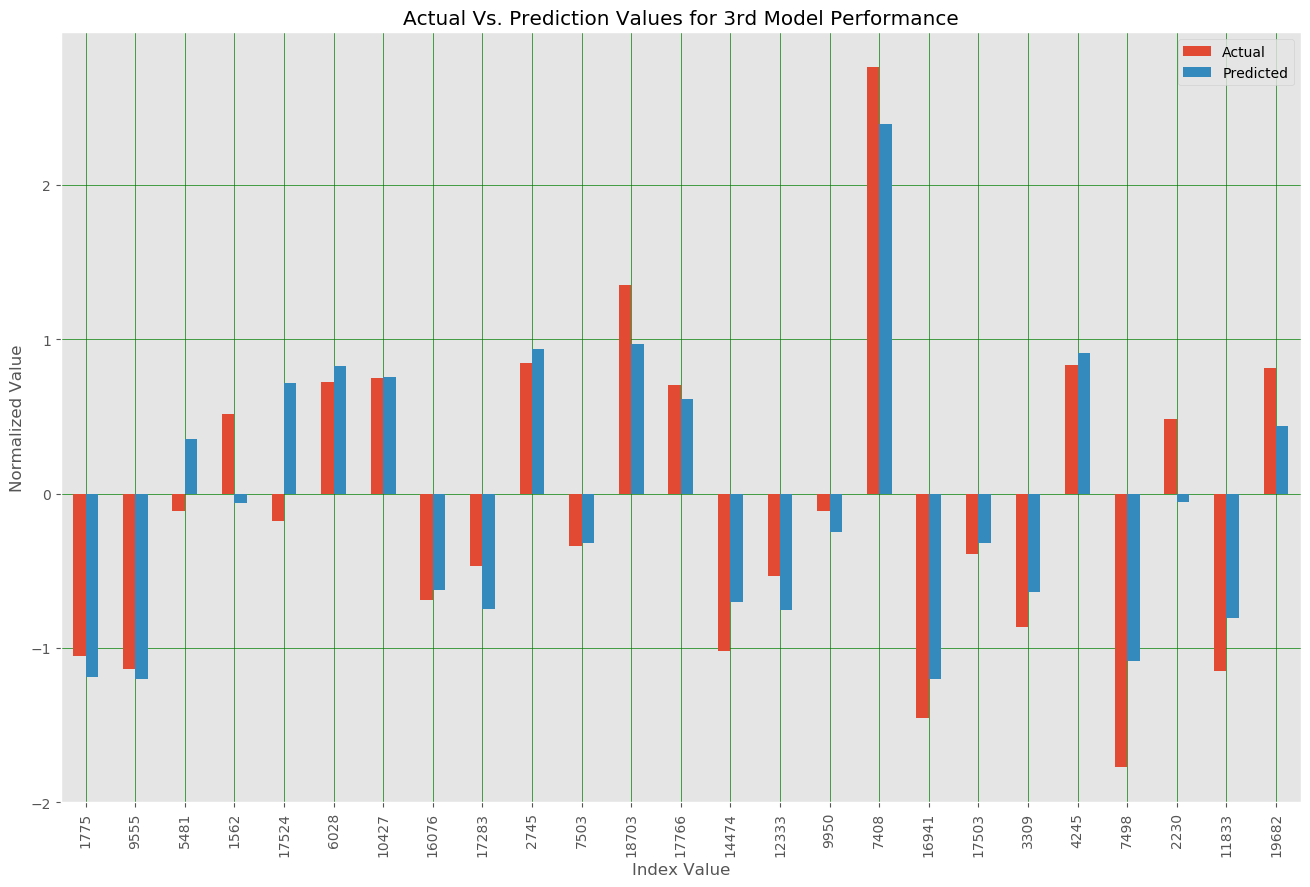

In [167]:
df1 = df_model.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Actual Vs. Prediction Values for 3rd Model Performance')
plt.ylabel('Normalized Value')
plt.xlabel('Index Value')
plt.show()

In [197]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('coefficient of determination R^2 of the prediction:', reg.score(X_test, y_test))

Mean Absolute Error: 0.3076337245356352
Mean Squared Error: 0.16653983429979327
Root Mean Squared Error: 0.4080929236090639
coefficient of determination R^2 of the prediction: 0.8344757279089347


### Conclusion
From the above, we see that the best model is in fact the last one which has dummy set 3 (x3). Recall that final model used the categorical variables 'bedrooms', 'bathrooms', 'floors', 'view', 'condition', 'grade', 'sqft_basement', 'yr_built', 'zipcode' and the continuous variable 'sqft_living15'. From this model, we are able to conclude that 'bedrooms', 'bathrooms', 'floors', 'view', 'condition', 'grade', and 'zipcode' are all features that have a p-value < 0.05 and result in a house value prediction of 83.45% success rate.

## Resources:
1. https://stackoverflow.com/questions/28161356/sort-pandas-dataframe-by-date
2. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pointbiserialr.html
3. https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f